# Práctica 43: Limpieza, manejo y transformación de datos con Pandas

####  Cargar el fichero **retail2.csv** en un dataframe de Pandas y efectuar todas las operaciones de consulta, exploración y limpieza de datos que sean necesarios algunos pasos de limpieza están de forma explícita como preguntas. Los ficheros contienen varias columnas y algunas de ellas tienen datos que podrían necesitar limpieza o tratamiento. 

**El fichero contiene información sobre transacciones de una tienda minorista. Los campos y su significado se muestran a continuación:**

`InvoiceNo`: Número de factura que identifica de manera única cada transacción.
  

`StockCode`:Código de stock que identifica de manera única cada producto.
 

`Descrption`.Descripción del producto.


`Quantity`: Cantidad de productos comprados (puede contener valores negativos que indican devoluciones).

`InvoiceDate`: Fecha y hora en que se realizó la transacción.


`UnitPrice`:Precio unitario del producto (algunos valores pueden estar en centavos en lugar de dólares).


`CustomerID`:ID único del cliente que realizó la compra.


`Country`:País donde reside el cliente (puede contener inconsistencias en mayúsculas/minúsculas y caracteres especiales).  

`CustomerName`:Nombre completo del cliente.


`Email`:Dirección de correo electrónico del cliente.  

`Address`:Dirección del cliente.  



`PhoneNumber`:Número de teléfono del cliente.



`Category`: Categoría del producto (por ejemplo, 'Electronics', 'Clothing', 'Home & Garden').

`Supplier`: Proveedor del producto.  

`StockLevel`: Nivel de inventario del producto.

`Discount`: Descuento aplicado al producto (en porcentaje).  

`SaleChannel`: Canal de venta (por ejemplo, 'Online', 'In-Store').

`ReturnStatus`: Estado de devolución del producto ('Returned', 'Not Returned').

`ProductWeight`: Peso del producto. Unidad: kilogramos.

`ProductDimensions`: Dimensiones del producto. Unidad: en el formato 'LxWxH cm'.

`ShippingCost`: Costo de envío. Unidad:dólares.

`SalesRegion`: Región de ventas (por ejemplo, 'North America', 'Europe', 'Asia').  

`PromotionCode`: Código de promoción aplicado a la compra.

`PaymentMethod`: Método de pago (por ejemplo, 'Credit Card', 'PayPal', 'Bank Transfer').


# Parte 1. Data Cleaning and Preparation (Capítulo 7 - Wes McKinney)

- Cargue los datasets `retail2.csv` y `exchange_rates.csv` en DataFrames de pandas.

## Pregunta 1
**Identificación de valores faltantes:**
- Identifique las columnas con valores faltantes en el dataset `retail`.

In [116]:
import pandas as pd 

In [117]:
df_retail = pd.read_csv('Datos/retail2.csv')
df_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerName,Email,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",6,12/1/2010 12:28,4.25,17763,United Kingdom,David Johnson,david.johnson@mail.com,...,853,17.28,Online,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer
1,536446.0,21756,DOORMAT NEW ENGLAND,100,12/1/2010 10:16,795.0,15939,United Kingdom,Henry Williams,henry.williams@test.org,...,910,9.08,Online,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer
2,536633.0,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 13:23,1.85,12295,United Kingdom,Jane Brown,jane.brown@mail.com,...,578,45.42,In-Store,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",10,12/1/2010 11:32,1.65,15685,United Kingdom,Frank Johnson,frank.johnson@example.com,...,75,29.17,Online,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal
4,NaN,22634,"{""description"": ""BAKING SET 9 PIECE RETROSPOT""}",6,12/1/2010 11:07,4.95,11696,United Kingdom,Eva Smith,eva.smith@mail.com,...,435,20.04,Online,Not Returned,1.64,70x31x19 cm,13.39,Australia,PROMO10,Bank Transfer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,536672.0,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 14:02,1.85,11526,Denmark,Grace Miller,grace.miller@demo.net,...,932,32.73,Online,Not Returned,7.04,32x11x45 cm,11.90,South America,DISCOUNT5,Credit Card
436,536529.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 11:39,3.39,19865,Denmark,Eva Williams,eva.williams@demo.net,...,292,13.66,Online,Returned,0.82,89x33x41 cm,5.87,Europe,DISCOUNT5,Credit Card
437,536396.0,22623,BOX OF VINTAGE JIGSAW BLOCKS,3,12/1/2010 9:26,4.95,11361,Denmark,Grace Davis,grace.davis@example.com,...,794,47.54,Online,Not Returned,8.24,8x11x86 cm,19.92,South America,NaN,PayPal
438,536368.0,21777,RECIPE BOX WITH METAL HEART,4,12/1/2010 8:35,795.0,19765,Denmark,David Smith,david.smith@example.com,...,811,7.55,In-Store,Returned,7.09,51x88x41 cm,5.87,South America,SALE15,PayPal


In [118]:
# Calcula el número de valores faltantes en cada columna
missing_values = df_retail.isnull().sum()

# Filtra las columnas que tienen al menos un valor faltante
missing_columns = missing_values[missing_values > 0]

# Mostrar las columnas con valores faltantes y su cantidad
missing_columns


InvoiceNo        20
Description      27
InvoiceDate       5
Country           1
PromotionCode    81
dtype: int64

In [119]:
df_retail.shape

(440, 24)

In [120]:
df_exchange = pd.read_csv('Datos/exchange_rates.csv')
df_exchange

,Date,ExchangeRate
0,2020-01-01,1.20
1,2020-01-02,1.19
2,2020-01-03,1.18
3,2020-01-04,1.21
4,2020-01-05,1.20
5,2020-01-06,1.22
6,2020-01-07,1.21
7,2020-01-08,1.23
8,2020-01-09,1.22
9,2020-01-10,1.20


In [121]:
# Calcula el número de valores faltantes en cada columna
missing_values_e = df_exchange.isnull().sum()

# Filtra las columnas que tienen al menos un valor faltante
missing_columns_e = missing_values_e[missing_values_e > 0]

# Mostrar las columnas con valores faltantes y su cantidad
missing_columns_e


Series([], dtype: int64)

## Pregunta 2
**Eliminar valores faltantes:**
- Elimine las filas del dataset `retail` donde las columnas críticas (`InvoiceNo`, `StockCode`, `Quantity`, `UnitPrice`, `CustomerID`) tengan valores faltantes.

In [122]:
# Nombres de las columnas con valores faltantes
columns_with_missing = missing_columns.index.tolist()

# Eliminar filas con valores faltantes en las columnas especificadas
df_retail_clean = df_retail.dropna(subset=columns_with_missing)

# Verificar el resultado
print(df_retail_clean.isnull().sum())


InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
CustomerName         0
Email                0
Address              0
PhoneNumber          0
Category             0
Supplier             0
StockLevel           0
Discount             0
SaleChannel          0
ReturnStatus         0
ProductWeight        0
ProductDimensions    0
ShippingCost         0
SalesRegion          0
PromotionCode        0
PaymentMethod        0
dtype: int64


## Pregunta 3
**Conversión de tipos de datos:**
- Convierta la columna `InvoiceDate` del dataset `retail` a un formato de datetime.

In [123]:
def fix_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%d/%m/%Y %H:%M')
    except ValueError:
        # Aquí podrías añadir lógica para corregir fechas conocidamente malformadas.
        return pd.NaT  # Retorna Not a Time para errores no corregibles automáticamente

# Aplicar la función a cada entrada de la columna 'InvoiceDate'
df_retail['InvoiceDate'] = df_retail['InvoiceDate'].apply(fix_date)



In [124]:
import pandas as pd

def fix_date(date_str):
    # Intentar convertir la fecha con el formato esperado
    try:
        return pd.to_datetime(date_str, format='%d/%m/%Y %H:%M')
    except ValueError:
        # Aquí podrías añadir lógica para corregir fechas conocidamente malformadas.
        # Por ejemplo, corregir un formato de hora erróneo como "25:61" a algo válido, si es posible
        # Este es un ejemplo simple de cómo podrías manejar un error específico
        # Supongamos que todas las horas "25:XX" deben ser "00:XX" del día siguiente
        if date_str.startswith('25:'):
            parts = date_str.split(' ')
            date_part = parts[0]
            time_part = parts[1]
            new_date_part = pd.to_datetime(date_part, format='%d/%m/%Y') + pd.Timedelta(days=1)
            new_time_part = '00:' + time_part[3:]
            corrected_datetime = f'{new_date_part.strftime("%d/%m/%Y")} {new_time_part}'
            return pd.to_datetime(corrected_datetime, format='%d/%m/%Y %H:%M', errors='coerce')
        return pd.NaT  # Retorna Not a Time para otros errores no corregibles automáticamente

# Aplicar la función a cada entrada de la columna 'InvoiceDate'
df_retail['InvoiceDate'] = df_retail['InvoiceDate'].apply(fix_date)

# Verificar los resultados
print(df_retail['InvoiceDate'].head())


0   2010-01-12 12:28:00
1   2010-01-12 10:16:00
2   2010-01-12 13:23:00
3   2010-01-12 11:32:00
4   2010-01-12 11:07:00
Name: InvoiceDate, dtype: datetime64[ns]


## Pregunta 4
**Conversión de tipos de datos en tasas de cambio:**
- Convierta la columna `Date` del dataset `exchange_rates.csv` a un formato de datetime.

In [196]:
df_exchange['Date'] = pd.to_datetime(df_exchange['Date'])

# Verificar la conversión
print(df_exchange['Date'].head())

0   2020-01-01
1   2020-01-02
2   2020-01-03
3   2020-01-04
4   2020-01-05
Name: Date, dtype: datetime64[ns]


## Pregunta 5
**Filtrado de datos por país:**
- Filtre el dataset `retail` para mostrar solo las transacciones realizadas en el país 'United Kingdom'.

In [125]:
# Filtrar el dataset para incluir solo las filas donde el país es 'United Kingdom'
df_uk = df_retail[df_retail['Country'] == 'United Kingdom']

# Verificar los resultados mostrando las primeras filas del dataset filtrado
display(df_uk.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerName,Email,...,StockLevel,Discount,SaleChannel,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",6,2010-01-12 12:28:00,4.25,17763,United Kingdom,David Johnson,david.johnson@mail.com,...,853,17.28,Online,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer
1,536446.0,21756,DOORMAT NEW ENGLAND,100,2010-01-12 10:16:00,795.0,15939,United Kingdom,Henry Williams,henry.williams@test.org,...,910,9.08,Online,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer
2,536633.0,22632,HAND WARMER RED POLKA DOT,6,2010-01-12 13:23:00,1.85,12295,United Kingdom,Jane Brown,jane.brown@mail.com,...,578,45.42,In-Store,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",10,2010-01-12 11:32:00,1.65,15685,United Kingdom,Frank Johnson,frank.johnson@example.com,...,75,29.17,Online,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal
4,NaN,22634,"{""description"": ""BAKING SET 9 PIECE RETROSPOT""}",6,2010-01-12 11:07:00,4.95,11696,United Kingdom,Eva Smith,eva.smith@mail.com,...,435,20.04,Online,Not Returned,1.64,70x31x19 cm,13.39,Australia,PROMO10,Bank Transfer


## Pregunta 6
**Calcular el total de precios:**
- Cree una nueva columna `TotalPrice` en el dataset `retail` multiplicando `Quantity` por `UnitPrice`.

In [126]:
# Convertir 'Quantity' y 'UnitPrice' a numéricos, manejar errores
df_retail['Quantity'] = pd.to_numeric(df_retail['Quantity'], errors='coerce')
df_retail['UnitPrice'] = pd.to_numeric(df_retail['UnitPrice'], errors='coerce')

# Verificar los tipos de datos para confirmar que ahora son numéricos
print(df_retail.dtypes[['Quantity', 'UnitPrice']])



Quantity     float64
UnitPrice    float64
dtype: object


In [127]:
# Crear la columna 'TotalPrice' multiplicando 'Quantity' por 'UnitPrice' nuevamente
df_retail['TotalPrice'] = df_retail['Quantity'] * df_retail['UnitPrice']

# Verificar los resultados mostrando las primeras filas del dataset con la nueva columna
display(df_retail[['Quantity', 'UnitPrice', 'TotalPrice']].head())


,Quantity,UnitPrice,TotalPrice
0,6.0,4.25,25.5
1,100.0,795.00,79500.0
2,6.0,1.85,11.1
3,10.0,1.65,16.5
4,6.0,4.95,29.7


## Pregunta 7
**Extraer mes y año:**
- Extraiga el mes y el año de la columna `InvoiceDate` y cree dos nuevas columnas: `InvoiceMonth` y `InvoiceYear`.

In [128]:
# Extraer el mes y el año de 'InvoiceDate'
df_retail['InvoiceMonth'] = df_retail['InvoiceDate'].dt.month
df_retail['InvoiceYear'] = df_retail['InvoiceDate'].dt.year

# Verificar los resultados mostrando las nuevas columnas junto con la columna original
display(df_retail[['InvoiceDate', 'InvoiceMonth', 'InvoiceYear']].head())


,InvoiceDate,InvoiceMonth,InvoiceYear
0,2010-01-12 12:28:00,1.0,2010.0
1,2010-01-12 10:16:00,1.0,2010.0
2,2010-01-12 13:23:00,1.0,2010.0
3,2010-01-12 11:32:00,1.0,2010.0
4,2010-01-12 11:07:00,1.0,2010.0


## Pregunta 8
**Eliminar duplicados:**
- Identifique y elimine las filas duplicadas en el dataset `retail` basadas en la combinación de `InvoiceNo` y `StockCode`.

In [129]:
# Eliminar duplicados basados en 'InvoiceNo' y 'StockCode'
df_retail = df_retail.drop_duplicates(subset=['InvoiceNo', 'StockCode'])

# Verificar los cambios viendo el tamaño del DataFrame y algunas filas
display(df_retail.shape)
display(df_retail.head())


(401, 27)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerName,Email,...,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod,TotalPrice,InvoiceMonth,InvoiceYear
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",6.0,2010-01-12 12:28:00,4.25,17763,United Kingdom,David Johnson,david.johnson@mail.com,...,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer,25.5,1.0,2010.0
1,536446.0,21756,DOORMAT NEW ENGLAND,100.0,2010-01-12 10:16:00,795.00,15939,United Kingdom,Henry Williams,henry.williams@test.org,...,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer,79500.0,1.0,2010.0
2,536633.0,22632,HAND WARMER RED POLKA DOT,6.0,2010-01-12 13:23:00,1.85,12295,United Kingdom,Jane Brown,jane.brown@mail.com,...,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer,11.1,1.0,2010.0
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",10.0,2010-01-12 11:32:00,1.65,15685,United Kingdom,Frank Johnson,frank.johnson@example.com,...,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal,16.5,1.0,2010.0
4,NaN,22634,"{""description"": ""BAKING SET 9 PIECE RETROSPOT""}",6.0,2010-01-12 11:07:00,4.95,11696,United Kingdom,Eva Smith,eva.smith@mail.com,...,Not Returned,1.64,70x31x19 cm,13.39,Australia,PROMO10,Bank Transfer,29.7,1.0,2010.0


## Pregunta 9
**Reemplazo de valores:**
- Reemplace todos los valores negativos en la columna `Quantity` con cero.

In [130]:
# Reemplazar valores negativos en 'Quantity' con cero
df_retail['Quantity'] = df_retail['Quantity'].apply(lambda x: max(x, 0))

# Verificar los cambios mostrando las filas donde 'Quantity' originalmente tenía valores negativos
display(df_retail[df_retail['Quantity'] == 0].head())


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\590363527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['Quantity'] = df_retail['Quantity'].apply(lambda x: max(x, 0))


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerName,Email,...,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod,TotalPrice,InvoiceMonth,InvoiceYear
6,536707.0,22139,RETROSPOT TEA SET CERAMIC 11 PC,0.0,2050-01-01 00:00:00,6.95,12783,United Kingdom,Grace Williams,grace.williams@mail.com,...,Not Returned,0.68,91x74x90 cm,9.90,South America,SALE15,Bank Transfer,-41.7,1.0,2050.0
20,536695.0,22139,RETROSPOT TEA SET CERAMIC 11 PC,0.0,2010-01-12 14:25:00,6.95,18811,United Kingdom,John Johnson,john.johnson@demo.net,...,Not Returned,6.16,18x47x49 cm,14.55,Europe,PROMO20,Cash,-41.7,1.0,2010.0
57,536607.0,22139,RETROSPOT TEA SET CERAMIC 11 PC,0.0,2010-01-12 12:57:00,6.95,15973,United Kingdom,David Williams,david.williams@example.com,...,Returned,2.04,50x12x65 cm,14.75,Europe,SALE15,Bank Transfer,-41.7,1.0,2010.0
100,536588.0,21723,STRIPED CHARLIE+LOLA CHARLOTTE BAG,0.0,1900-01-01 00:00:00,2.95,12765,United Kingdom,Alice Davis,alice.davis@mail.com,...,Not Returned,0.41,3x23x18 cm,10.39,Australia,SALE15,Cash,-59.0,1.0,1900.0
119,536658.0,22139,RETROSPOT TEA SET CERAMIC 11 PC,0.0,2010-01-12 13:48:00,6.95,17423,United Kingdom,Bob Brown,bob.brown@example.com,...,Returned,5.44,3x31x40 cm,8.73,Asia,DISCOUNT5,Bank Transfer,-41.7,1.0,2010.0


## Pregunta 10
**Transformación de datos:**
- Cree una nueva columna `DiscountedPrice` aplicando un descuento del 10% al `TotalPrice`.

In [131]:
# Crear la columna 'DiscountedPrice' aplicando un descuento del 10% al 'TotalPrice'
df_retail['DiscountedPrice'] = df_retail['TotalPrice'] * 0.90

# Verificar los resultados mostrando las nuevas columnas junto con la columna original
display(df_retail[['TotalPrice', 'DiscountedPrice']].head())


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\2876149880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['DiscountedPrice'] = df_retail['TotalPrice'] * 0.90


,TotalPrice,DiscountedPrice
0,25.5,22.95
1,79500.0,71550.00
2,11.1,9.99
3,16.5,14.85
4,29.7,26.73


# Parte 2. Data Wrangling: Join, Combine, and Reshape (Capítulo 8)

## Pregunta 11
**Merge de datasets:**
- Realice un merge del dataset `retail` con el dataset `exchange_rates.csv` en las columnas de fecha (`InvoiceDate` de `retail` y `Date` de `exchange_rates.csv`).

In [132]:
# Asegurar que las fechas en ambos datasets son del tipo datetime
df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])
df_exchange['Date'] = pd.to_datetime(df_exchange['Date'])

# Realizar el merge en las columnas de fecha
df_merged = pd.merge(df_retail, df_exchange, left_on='InvoiceDate', right_on='Date', how='left')

# Verificar los primeros registros del nuevo dataset combinado
display(df_merged.head())


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\222930093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerName,Email,...,ShippingCost,SalesRegion,PromotionCode,PaymentMethod,TotalPrice,InvoiceMonth,InvoiceYear,DiscountedPrice,Date,ExchangeRate
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",6.0,2010-01-12 12:28:00,4.25,17763,United Kingdom,David Johnson,david.johnson@mail.com,...,7.14,North America,SALE15,Bank Transfer,25.5,1.0,2010.0,22.95,NaT,NaN
1,536446.0,21756,DOORMAT NEW ENGLAND,100.0,2010-01-12 10:16:00,795.00,15939,United Kingdom,Henry Williams,henry.williams@test.org,...,12.48,Asia,SALE15,Bank Transfer,79500.0,1.0,2010.0,71550.00,NaT,NaN
2,536633.0,22632,HAND WARMER RED POLKA DOT,6.0,2010-01-12 13:23:00,1.85,12295,United Kingdom,Jane Brown,jane.brown@mail.com,...,14.27,North America,DISCOUNT5,Bank Transfer,11.1,1.0,2010.0,9.99,NaT,NaN
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",10.0,2010-01-12 11:32:00,1.65,15685,United Kingdom,Frank Johnson,frank.johnson@example.com,...,15.54,Asia,NaN,PayPal,16.5,1.0,2010.0,14.85,NaT,NaN
4,NaN,22634,"{""description"": ""BAKING SET 9 PIECE RETROSPOT""}",6.0,2010-01-12 11:07:00,4.95,11696,United Kingdom,Eva Smith,eva.smith@mail.com,...,13.39,Australia,PROMO10,Bank Transfer,29.7,1.0,2010.0,26.73,NaT,NaN


## Pregunta 12
**Concatenación de datasets:**
- Concatenar dos subconjuntos del dataset `retail`, uno con las primeras 100 filas y otro con las últimas 100 filas.

In [133]:
# Extraer las primeras 100 filas y las últimas 100 filas
first_100 = df_retail.head(100)
last_100 = df_retail.tail(100)

# Concatenar los dos subconjuntos
concatenated_df = pd.concat([first_100, last_100], ignore_index=True)

# Verificar los resultados
display(concatenated_df)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerName,Email,...,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod,TotalPrice,InvoiceMonth,InvoiceYear,DiscountedPrice
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",6.0,2010-01-12 12:28:00,4.25,17763,United Kingdom,David Johnson,david.johnson@mail.com,...,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer,25.50,1.0,2010.0,22.950
1,536446.0,21756,DOORMAT NEW ENGLAND,100.0,2010-01-12 10:16:00,795.00,15939,United Kingdom,Henry Williams,henry.williams@test.org,...,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer,79500.00,1.0,2010.0,71550.000
2,536633.0,22632,HAND WARMER RED POLKA DOT,6.0,2010-01-12 13:23:00,1.85,12295,United Kingdom,Jane Brown,jane.brown@mail.com,...,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer,11.10,1.0,2010.0,9.990
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",10.0,2010-01-12 11:32:00,1.65,15685,United Kingdom,Frank Johnson,frank.johnson@example.com,...,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal,16.50,1.0,2010.0,14.850
4,NaN,22634,"{""description"": ""BAKING SET 9 PIECE RETROSPOT""}",6.0,2010-01-12 11:07:00,4.95,11696,United Kingdom,Eva Smith,eva.smith@mail.com,...,1.64,70x31x19 cm,13.39,Australia,PROMO10,Bank Transfer,29.70,1.0,2010.0,26.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,536713.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,NaT,2.55,14426,Denmark,Henry Johnson,henry.johnson@example.com,...,7.64,11x64x77 cm,14.75,Asia,NaN,Credit Card,15.30,NaN,NaN,13.770
196,536585.0,21756,DOORMAT NEW ENGLAND,10.0,2010-01-12 12:35:00,7.95,11551,Denmark,Henry Wilson,henry.wilson@example.com,...,6.22,81x72x21 cm,7.28,Asia,PROMO20,Credit Card,79.50,1.0,2010.0,71.550
197,536526.0,71053,WHITE METAL LANTERN,6.0,2010-01-12 11:36:00,3.39,11629,Denmark,Eva Davis,eva.davis@demo.net,...,1.10,18x94x64 cm,5.92,North America,NaN,Cash,20.34,1.0,2010.0,18.306
198,536368.0,21777,RECIPE BOX WITH METAL HEART,4.0,2010-01-12 08:35:00,795.00,19765,Denmark,David Smith,david.smith@example.com,...,7.09,51x88x41 cm,5.87,South America,SALE15,PayPal,3180.00,1.0,2010.0,2862.000


## Pregunta 13
**Pivot table:**
- Cree una tabla dinámica (pivot table) que muestre el total de `TotalPrice` para cada `Country` y `InvoiceYear`.

In [134]:
# Crear la tabla dinámica
pivot_table = df_retail.pivot_table(
    values='TotalPrice',
    index='Country',
    columns='InvoiceYear',
    aggfunc='sum',  # Agregación por suma
    fill_value=0    # Rellenar con ceros donde no hay valores
)

# Mostrar la tabla dinámica
display(pivot_table)


InvoiceYear,1900.0,2010.0,2050.0
Country,,,
### CHOCOLATE HOT WATER BOTTLE ###,0.00,33.90,0.0
### united kingdom ###,0.00,20.34,0.0
BOX OF VINTAGE ALPHABET BLOCKS,0.00,19.90,0.0
BOX OF VINTAGE JIGSAW BLOCKS,0.00,14.85,0.0
Denmark,99.92,47027.41,16.5
England,0.00,52.65,0.0
Germany,54.15,46188.96,64.8
KNITTED UNION FLAG HOT WATER BOTTLE,0.00,20.34,0.0
RED HARMONICA IN BOX,0.00,12.50,0.0


## Pregunta 14
**Reshape con melt:**
- Transforme el dataset `retail` de formato ancho a largo usando la función `melt` de pandas.

In [135]:
# Usar melt para transformar el dataset
melted_df = pd.melt(
    df_retail,
    id_vars=['InvoiceNo', 'Country'],  # Columnas que quieres mantener como identificadores
    var_name='Attribute',  # Nombre de la nueva columna que contiene los nombres de las variables
    value_name='Value'      # Nombre de la nueva columna que contiene los valores
)

# Mostrar los resultados
display(melted_df.head())


,InvoiceNo,Country,Attribute,Value
0,536578.0,United Kingdom,StockCode,84969
1,536446.0,United Kingdom,StockCode,21756
2,536633.0,United Kingdom,StockCode,22632
3,536522.0,United Kingdom,StockCode,22111
4,NaN,United Kingdom,StockCode,22634


## Pregunta 15
**Combinar datos con overlap:**
- Combine dos DataFrames con columnas `CustomerID` y `TotalPrice`, teniendo en cuenta el overlap entre los datos.

In [136]:
# Merge basado en la columna de fecha para incluir la tasa de cambio
df_combined = pd.merge(df_retail, df_exchange, left_on='InvoiceDate', right_on='Date', how='left')

# Eliminar la columna 'Date' duplicada si es necesario
df_combined.drop('Date', axis=1, inplace=True)

# Mostrar los primeros registros para verificar
display(df_combined.head())


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerName,Email,...,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod,TotalPrice,InvoiceMonth,InvoiceYear,DiscountedPrice,ExchangeRate
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",6.0,2010-01-12 12:28:00,4.25,17763,United Kingdom,David Johnson,david.johnson@mail.com,...,37x38x83 cm,7.14,North America,SALE15,Bank Transfer,25.5,1.0,2010.0,22.95,NaN
1,536446.0,21756,DOORMAT NEW ENGLAND,100.0,2010-01-12 10:16:00,795.00,15939,United Kingdom,Henry Williams,henry.williams@test.org,...,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer,79500.0,1.0,2010.0,71550.00,NaN
2,536633.0,22632,HAND WARMER RED POLKA DOT,6.0,2010-01-12 13:23:00,1.85,12295,United Kingdom,Jane Brown,jane.brown@mail.com,...,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer,11.1,1.0,2010.0,9.99,NaN
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",10.0,2010-01-12 11:32:00,1.65,15685,United Kingdom,Frank Johnson,frank.johnson@example.com,...,45x4x36 cm,15.54,Asia,NaN,PayPal,16.5,1.0,2010.0,14.85,NaN
4,NaN,22634,"{""description"": ""BAKING SET 9 PIECE RETROSPOT""}",6.0,2010-01-12 11:07:00,4.95,11696,United Kingdom,Eva Smith,eva.smith@mail.com,...,70x31x19 cm,13.39,Australia,PROMO10,Bank Transfer,29.7,1.0,2010.0,26.73,NaN


## Pregunta 16
**Join con índices:**
- Realice un join de dos DataFrames basándose en los índices.

In [137]:
# Realizar el join basándose en los índices
df_joined = df_retail.join(df_exchange, lsuffix='_retail', rsuffix='_exchange', how='outer')

# Mostrar los primeros registros para verificar el join
display(df_joined.head())


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerName,Email,...,ShippingCost,SalesRegion,PromotionCode,PaymentMethod,TotalPrice,InvoiceMonth,InvoiceYear,DiscountedPrice,Date,ExchangeRate
0,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",6.0,2010-01-12 12:28:00,4.25,17763,United Kingdom,David Johnson,david.johnson@mail.com,...,7.14,North America,SALE15,Bank Transfer,25.5,1.0,2010.0,22.95,2020-01-01,1.20
1,536446.0,21756,DOORMAT NEW ENGLAND,100.0,2010-01-12 10:16:00,795.00,15939,United Kingdom,Henry Williams,henry.williams@test.org,...,12.48,Asia,SALE15,Bank Transfer,79500.0,1.0,2010.0,71550.00,2020-01-02,1.19
2,536633.0,22632,HAND WARMER RED POLKA DOT,6.0,2010-01-12 13:23:00,1.85,12295,United Kingdom,Jane Brown,jane.brown@mail.com,...,14.27,North America,DISCOUNT5,Bank Transfer,11.1,1.0,2010.0,9.99,2020-01-03,1.18
3,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",10.0,2010-01-12 11:32:00,1.65,15685,United Kingdom,Frank Johnson,frank.johnson@example.com,...,15.54,Asia,NaN,PayPal,16.5,1.0,2010.0,14.85,2020-01-04,1.21
4,NaN,22634,"{""description"": ""BAKING SET 9 PIECE RETROSPOT""}",6.0,2010-01-12 11:07:00,4.95,11696,United Kingdom,Eva Smith,eva.smith@mail.com,...,13.39,Australia,PROMO10,Bank Transfer,29.7,1.0,2010.0,26.73,2020-01-05,1.20


## Pregunta 17
**Cambio de nivel de índices:**
- Cambie los niveles de los índices en un MultiIndex en el dataset `retail`.

In [138]:
# Crear un MultiIndex con las columnas 'Country' y 'InvoiceYear'
df_retail_multi = df_retail.set_index(['Country', 'InvoiceYear'])

# Verificar el índice para asegurarte de que se creó el MultiIndex
print(df_retail_multi.index)


MultiIndex([('United Kingdom', 2010.0),
            ('United Kingdom', 2010.0),
            ('United Kingdom', 2010.0),
            ('United Kingdom', 2010.0),
            ('United Kingdom', 2010.0),
            ('United Kingdom', 2010.0),
            ('United Kingdom', 2050.0),
            ('United Kingdom', 2010.0),
            ('United Kingdom', 2010.0),
            ('United Kingdom', 2010.0),
            ...
            (       'Denmark', 2010.0),
            (       'Denmark', 2010.0),
            (       'Denmark', 2010.0),
            (       'Denmark', 2010.0),
            (       'Denmark',    nan),
            (       'Denmark',    nan),
            (       'Denmark', 2010.0),
            (       'Denmark', 2010.0),
            (       'Denmark', 2010.0),
            (       'Denmark', 2010.0)],
           names=['Country', 'InvoiceYear'], length=401)


In [139]:
# Cambiar los niveles del MultiIndex
df_retail_swapped = df_retail_multi.swaplevel('Country', 'InvoiceYear')

# Verificar el resultado
print(df_retail_swapped.index)


MultiIndex([(2010.0, 'United Kingdom'),
            (2010.0, 'United Kingdom'),
            (2010.0, 'United Kingdom'),
            (2010.0, 'United Kingdom'),
            (2010.0, 'United Kingdom'),
            (2010.0, 'United Kingdom'),
            (2050.0, 'United Kingdom'),
            (2010.0, 'United Kingdom'),
            (2010.0, 'United Kingdom'),
            (2010.0, 'United Kingdom'),
            ...
            (2010.0,        'Denmark'),
            (2010.0,        'Denmark'),
            (2010.0,        'Denmark'),
            (2010.0,        'Denmark'),
            (   nan,        'Denmark'),
            (   nan,        'Denmark'),
            (2010.0,        'Denmark'),
            (2010.0,        'Denmark'),
            (2010.0,        'Denmark'),
            (2010.0,        'Denmark')],
           names=['InvoiceYear', 'Country'], length=401)


In [140]:
# Restablecer los niveles del índice a columnas normales
df_retail_reset = df_retail_swapped.reset_index()

# Verificar el resultado
display(df_retail_reset.head())


,InvoiceYear,Country,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,CustomerName,...,ReturnStatus,ProductWeight,ProductDimensions,ShippingCost,SalesRegion,PromotionCode,PaymentMethod,TotalPrice,InvoiceMonth,DiscountedPrice
0,2010.0,United Kingdom,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",6.0,2010-01-12 12:28:00,4.25,17763,David Johnson,...,Not Returned,3.81,37x38x83 cm,7.14,North America,SALE15,Bank Transfer,25.5,1.0,22.95
1,2010.0,United Kingdom,536446.0,21756,DOORMAT NEW ENGLAND,100.0,2010-01-12 10:16:00,795.00,15939,Henry Williams,...,Not Returned,9.51,8x65x86 cm,12.48,Asia,SALE15,Bank Transfer,79500.0,1.0,71550.00
2,2010.0,United Kingdom,536633.0,22632,HAND WARMER RED POLKA DOT,6.0,2010-01-12 13:23:00,1.85,12295,Jane Brown,...,Returned,7.35,17x71x89 cm,14.27,North America,DISCOUNT5,Bank Transfer,11.1,1.0,9.99
3,2010.0,United Kingdom,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",10.0,2010-01-12 11:32:00,1.65,15685,Frank Johnson,...,Returned,6.03,45x4x36 cm,15.54,Asia,NaN,PayPal,16.5,1.0,14.85
4,2010.0,United Kingdom,NaN,22634,"{""description"": ""BAKING SET 9 PIECE RETROSPOT""}",6.0,2010-01-12 11:07:00,4.95,11696,Eva Smith,...,Not Returned,1.64,70x31x19 cm,13.39,Australia,PROMO10,Bank Transfer,29.7,1.0,26.73


## Pregunta 18
**Reordenamiento de niveles:**
- Reordene los niveles del índice en un DataFrame con MultiIndex.

In [141]:
# Crear un MultiIndex con las columnas 'Country' y 'InvoiceYear'
df_retail_multi = df_retail.set_index(['Country', 'InvoiceYear'])

# Verificar los niveles del MultiIndex
print(df_retail_multi.index.names)


['Country', 'InvoiceYear']


In [142]:
# Reordenar los niveles del MultiIndex
df_retail_reordered = df_retail_multi.reorder_levels(['InvoiceYear', 'Country'])

# Verificar el nuevo orden de los niveles
print(df_retail_reordered.index.names)


['InvoiceYear', 'Country']


## Pregunta 19
**Agregación por nivel:**
- Realice una agregación de los datos por nivel en un MultiIndex.

In [143]:
# Asegurarte de que tienes un MultiIndex en tu DataFrame
df_retail_multi = df_retail.set_index(['Country', 'InvoiceYear'])

# Agregar los datos por el nivel 'Country', sumando el 'TotalPrice'
agg_by_country = df_retail_multi.groupby(level='Country').agg({'TotalPrice': 'sum'})

# Verificar el resultado
print(agg_by_country)


                                             TotalPrice
Country                                                
### CHOCOLATE HOT WATER BOTTLE ###                33.90
### FELTCRAFT PRINCESS CHARLOTTE DOLL ###         30.00
### U.K. ###                                      19.80
### united kingdom ###                            20.34
BOX OF VINTAGE ALPHABET BLOCKS                    19.90
BOX OF VINTAGE JIGSAW BLOCKS                      14.85
Denmark                                        49154.65
England                                           67.95
Germany                                        59010.81
KNITTED UNION FLAG HOT WATER BOTTLE               20.34
RED HARMONICA IN BOX                              12.50
SCANDINAVIAN REDS RIBBONS                         33.00
STRIPED CHARLIE+LOLA CHARLOTTE BAG: details       59.00
U.K.                                             120.80
United Kingdom                                124500.34
united kingdom                                  

In [144]:
# Agregar los datos por el nivel 'InvoiceYear', sumando el 'TotalPrice'
agg_by_year = df_retail_multi.groupby(level='InvoiceYear').agg({'TotalPrice': 'sum'})

# Verificar el resultado
print(agg_by_year)


             TotalPrice
InvoiceYear            
1900.0           133.97
2010.0        217950.24
2050.0           143.60


In [145]:
# Agregar por los niveles 'Country' y 'InvoiceYear'
agg_by_country_year = df_retail_multi.groupby(level=['Country', 'InvoiceYear']).agg({'TotalPrice': 'sum'})

# Verificar el resultado
print(agg_by_country_year)


                                                         TotalPrice
Country                                     InvoiceYear            
### CHOCOLATE HOT WATER BOTTLE ###          2010.0            33.90
### united kingdom ###                      2010.0            20.34
BOX OF VINTAGE ALPHABET BLOCKS              2010.0            19.90
BOX OF VINTAGE JIGSAW BLOCKS                2010.0            14.85
Denmark                                     1900.0            99.92
                                            2010.0         47027.41
                                            2050.0            16.50
England                                     2010.0            52.65
Germany                                     1900.0            54.15
                                            2010.0         46188.96
                                            2050.0            64.80
KNITTED UNION FLAG HOT WATER BOTTLE         2010.0            20.34
RED HARMONICA IN BOX                        2010

## Pregunta 20
**Creación de MultiIndex:**
- Cree un MultiIndex a partir de las columnas `Country` y `InvoiceYear` en el dataset `retail`.

In [146]:
# Asegurarte de que la columna 'InvoiceYear' esté presente
df_retail['InvoiceYear'] = df_retail['InvoiceDate'].dt.year

# Crear el MultiIndex usando las columnas 'Country' y 'InvoiceYear'
df_retail_multi = df_retail.set_index(['Country', 'InvoiceYear'])

# Verificar el MultiIndex
print(df_retail_multi.index)


MultiIndex([('United Kingdom', 2010.0),
            ('United Kingdom', 2010.0),
            ('United Kingdom', 2010.0),
            ('United Kingdom', 2010.0),
            ('United Kingdom', 2010.0),
            ('United Kingdom', 2010.0),
            ('United Kingdom', 2050.0),
            ('United Kingdom', 2010.0),
            ('United Kingdom', 2010.0),
            ('United Kingdom', 2010.0),
            ...
            (       'Denmark', 2010.0),
            (       'Denmark', 2010.0),
            (       'Denmark', 2010.0),
            (       'Denmark', 2010.0),
            (       'Denmark',    nan),
            (       'Denmark',    nan),
            (       'Denmark', 2010.0),
            (       'Denmark', 2010.0),
            (       'Denmark', 2010.0),
            (       'Denmark', 2010.0)],
           names=['Country', 'InvoiceYear'], length=401)


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\4207946342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['InvoiceYear'] = df_retail['InvoiceDate'].dt.year


In [147]:
# Mostrar las primeras filas para verificar
display(df_retail_multi.head())


InvoiceNo StockCode  \
Country        InvoiceYear                        
United Kingdom 2010.0        536578.0     84969   
               2010.0        536446.0     21756   
               2010.0        536633.0     22632   
               2010.0        536522.0     22111   
               2010.0             NaN     22634   

                                                                  Description  \
Country        InvoiceYear                                                      
United Kingdom 2010.0       ["description": "BOX OF 6 ASSORTED COLOUR TEAS...   
               2010.0                                     DOORMAT NEW ENGLAND   
               2010.0                               HAND WARMER RED POLKA DOT   
               2010.0            {"description": "SCANDINAVIAN REDS RIBBONS"}   
               2010.0         {"description": "BAKING SET 9 PIECE RETROSPOT"}   

                            Quantity         InvoiceDate  UnitPrice  \
Country        InvoiceYear                                            
United Kingdom 2010.0            6.0 2010-01-12 12:28:00       4.25   
               2010.0          100.0 2010-01-12 10:16:00     795.00   
               2010.0            6.0 2010-01-12 13:23:00       1.85   
               2010.0           10.0 2010-01-12 11:32:00       1.65   
               2010.0            6.0 2010-01-12 11:07:00       4.95   

                            CustomerID    CustomerName  \
Country        InvoiceYear                               
United Kingdom 2010.0            17763   David Johnson   
               2010.0            15939  Henry Williams   
               2010.0            12295      Jane Brown   
               2010.0            15685   Frank Johnson   
               2010.0            11696       Eva Smith   

                                                Email       Address  ...  \
Country        InvoiceYear                                           ...   
United Kingdom 2010.0          david.johnson@mail.com    450 Ash St  ...   
               2010.0         henry.williams@test.org  815 Maple St  ...   
               2010.0             jane.brown@mail.com   253 High St  ...   
               2010.0       frank.johnson@example.com    883 Elm St  ...   
               2010.0              eva.smith@mail.com   709 Pine St  ...   

                            ReturnStatus ProductWeight ProductDimensions  \
Country        InvoiceYear                                                 
United Kingdom 2010.0       Not Returned          3.81       37x38x83 cm   
               2010.0       Not Returned          9.51        8x65x86 cm   
               2010.0           Returned          7.35       17x71x89 cm   
               2010.0           Returned          6.03        45x4x36 cm   
               2010.0       Not Returned          1.64       70x31x19 cm   

                            ShippingCost    SalesRegion PromotionCode  \
Country        InvoiceYear                                              
United Kingdom 2010.0               7.14  North America        SALE15   
               2010.0              12.48           Asia        SALE15   
               2010.0              14.27  North America     DISCOUNT5   
               2010.0              15.54           Asia           NaN   
               2010.0              13.39      Australia       PROMO10   

                            PaymentMethod  TotalPrice InvoiceMonth  \
Country        InvoiceYear                                           
United Kingdom 2010.0       Bank Transfer        25.5          1.0   
               2010.0       Bank Transfer     79500.0          1.0   
               2010.0       Bank Transfer        11.1          1.0   
               2010.0              PayPal        16.5          1.0   
               2010.0       Bank Transfer        29.7          1.0   

                            DiscountedPrice  
Country        InvoiceYear                   
United Kingdom 2010.0               

# Parte 3 Data Aggregation and Group Operations (Capitulo 10)

## Pregunta 21
**Agrupación por cliente:**
- Agrupe los datos del dataset `retail` por `CustomerID` y calcule el total de `TotalPrice` por cliente.

In [148]:
# Asegurarte de que la columna 'TotalPrice' existe (si no, puedes crearla)
df_retail['TotalPrice'] = df_retail['Quantity'] * df_retail['UnitPrice']

# Agrupar por 'CustomerID' y calcular el total de 'TotalPrice' por cliente
total_price_by_customer = df_retail.groupby('CustomerID').agg({'TotalPrice': 'sum'})

# Mostrar los primeros resultados para verificar
print(total_price_by_customer.head())


            TotalPrice
CustomerID            
10018            14.85
10049            15.30
10082            12.50
10112            20.34
10139            29.70


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\3484758229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['TotalPrice'] = df_retail['Quantity'] * df_retail['UnitPrice']


## Pregunta 22
**Agrupación por producto:**
- Agrupe los datos del dataset `retail` por `StockCode` y calcule la cantidad total vendida (`Quantity`).

In [149]:
# Agrupar por 'StockCode' y calcular la cantidad total vendida ('Quantity') por producto
total_quantity_by_product = df_retail.groupby('StockCode').agg({'Quantity': 'sum'})

# Mostrar los primeros resultados para verificar
display(total_quantity_by_product.head())


,Quantity
StockCode,
21723,360.0
21724,190.0
21730,48.0
21731,168.0
21754,27.0


## Pregunta 23
**Agrupación por mes y año:**
- Agrupe los datos del dataset `retail` por `InvoiceMonth` y `InvoiceYear`, y calcule el total de `TotalPrice`.

In [150]:
# Extraer el mes y el año de 'InvoiceDate'
df_retail['InvoiceMonth'] = df_retail['InvoiceDate'].dt.month
df_retail['InvoiceYear'] = df_retail['InvoiceDate'].dt.year


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\2638577335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['InvoiceMonth'] = df_retail['InvoiceDate'].dt.month
C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\2638577335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['InvoiceYear'] = df_retail['InvoiceDate'].dt.year


In [151]:
# Agrupar por 'InvoiceMonth' y 'InvoiceYear' y calcular el total de 'TotalPrice'
total_price_by_month_year = df_retail.groupby(['InvoiceMonth', 'InvoiceYear']).agg({'TotalPrice': 'sum'})

# Mostrar los primeros resultados para verificar
display(total_price_by_month_year.head())


TotalPrice
InvoiceMonth InvoiceYear            
1.0          1900.0           192.97
             2010.0        233460.29
             2050.0           185.30

## Pregunta 24
**Conteo de transacciones:**
- Cuente el número total de transacciones por `Country` y `InvoiceYear`.

In [152]:
# Extraer el año de 'InvoiceDate' si no lo has hecho previamente
df_retail['InvoiceYear'] = df_retail['InvoiceDate'].dt.year


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\2410784773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['InvoiceYear'] = df_retail['InvoiceDate'].dt.year


In [153]:
# Contar el número de transacciones (facturas) por 'Country' y 'InvoiceYear'
transaction_count_by_country_year = df_retail.groupby(['Country', 'InvoiceYear']).agg({'InvoiceNo': 'nunique'})

# Renombrar la columna resultante para reflejar el conteo de transacciones
transaction_count_by_country_year.rename(columns={'InvoiceNo': 'TransactionCount'}, inplace=True)

# Mostrar los primeros resultados para verificar
display(transaction_count_by_country_year.head())


,,TransactionCount
Country,InvoiceYear,
### CHOCOLATE HOT WATER BOTTLE ###,2010.0,1
### united kingdom ###,2010.0,1
BOX OF VINTAGE ALPHABET BLOCKS,2010.0,1
BOX OF VINTAGE JIGSAW BLOCKS,2010.0,1
Denmark,1900.0,3


## Pregunta 25
**Función de agregación personalizada:**
- Cree una función de agregación personalizada que calcule el promedio y la desviación estándar de `TotalPrice` por `Country`.

In [154]:
# Agrupar por 'Country' y calcular el promedio y desviación estándar de 'TotalPrice'
agg_by_country = df_retail.groupby('Country')['TotalPrice'].agg(['mean', 'std']).rename(columns={
    'mean': 'MeanTotalPrice', 
    'std': 'StdTotalPrice'
})

# Mostrar los resultados
print(agg_by_country.head())


                                           MeanTotalPrice  StdTotalPrice
Country                                                                 
### CHOCOLATE HOT WATER BOTTLE ###                  33.90            NaN
### FELTCRAFT PRINCESS CHARLOTTE DOLL ###           30.00            NaN
### U.K. ###                                        19.80            NaN
### united kingdom ###                              20.34            NaN
BOX OF VINTAGE ALPHABET BLOCKS                      19.90            NaN


## Pregunta 26
**Agrupación y transformaciones:**
- Agrupe los datos por `CustomerID` y normalice el `TotalPrice` restando la media y dividiendo por la desviación estándar dentro de cada grupo.

In [155]:
# Agrupar por 'CustomerID' y normalizar 'TotalPrice'
df_retail['NormalizedTotalPrice'] = df_retail.groupby('CustomerID')['TotalPrice'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# Mostrar los primeros resultados para verificar
print(df_retail[['CustomerID', 'TotalPrice', 'NormalizedTotalPrice']].head())


   CustomerID  TotalPrice  NormalizedTotalPrice
0       17763        25.5                   NaN
1       15939     79500.0                   NaN
2       12295        11.1                   NaN
3       15685        16.5                   NaN
4       11696        29.7                   NaN


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\2794122005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['NormalizedTotalPrice'] = df_retail.groupby('CustomerID')['TotalPrice'].transform(


## Pregunta 27
**Filtrado de grupos:**
- Filtre los grupos de `CustomerID` que tengan un `TotalPrice` promedio mayor a 500.

In [156]:
# Agrupar por 'CustomerID' y calcular el promedio de 'TotalPrice'
average_total_price = df_retail.groupby('CustomerID')['TotalPrice'].mean()

# Filtrar los grupos donde el promedio de 'TotalPrice' sea mayor a 500
filtered_customers = average_total_price[average_total_price > 500].index

# Filtrar el DataFrame original para mantener solo los clientes filtrados
df_filtered = df_retail[df_retail['CustomerID'].isin(filtered_customers)]

# Mostrar los primeros resultados
print(df_filtered[['CustomerID', 'TotalPrice']].head())


     CustomerID  TotalPrice
1         15939     79500.0
33        17186      1785.0
67        13326     20340.0
102       18307      3390.0
112       19256        16.5


## Pregunta 28
**Aplicación de múltiples funciones:**
- Aplique múltiples funciones de agregación (suma, promedio, máximo) a la columna `TotalPrice` agrupando por `Country`.

In [157]:
# Agrupar por 'Country' y aplicar múltiples funciones de agregación a 'TotalPrice'
agg_by_country = df_retail.groupby('Country')['TotalPrice'].agg(['sum', 'mean', 'max'])

# Renombrar las columnas resultantes para mayor claridad
agg_by_country.rename(columns={
    'sum': 'TotalPriceSum', 
    'mean': 'TotalPriceMean', 
    'max': 'TotalPriceMax'
}, inplace=True)

# Mostrar los resultados
print(agg_by_country.head())


                                           TotalPriceSum  TotalPriceMean  \
Country                                                                    
### CHOCOLATE HOT WATER BOTTLE ###                 33.90           33.90   
### FELTCRAFT PRINCESS CHARLOTTE DOLL ###          30.00           30.00   
### U.K. ###                                       19.80           19.80   
### united kingdom ###                             20.34           20.34   
BOX OF VINTAGE ALPHABET BLOCKS                     19.90           19.90   

                                           TotalPriceMax  
Country                                                   
### CHOCOLATE HOT WATER BOTTLE ###                 33.90  
### FELTCRAFT PRINCESS CHARLOTTE DOLL ###          30.00  
### U.K. ###                                       19.80  
### united kingdom ###                             20.34  
BOX OF VINTAGE ALPHABET BLOCKS                     19.90  


## Pregunta 29
**Creación de columnas derivadas:**
- Cree una nueva columna `AvgTotalPrice` que contenga el promedio de `TotalPrice` por `CustomerID`.

In [158]:
# Calcular el promedio de 'TotalPrice' por 'CustomerID' y asignarlo a una nueva columna
df_retail['AvgTotalPrice'] = df_retail.groupby('CustomerID')['TotalPrice'].transform('mean')

# Mostrar las primeras filas del DataFrame para verificar
print(df_retail[['CustomerID', 'TotalPrice', 'AvgTotalPrice']].head())


   CustomerID  TotalPrice  AvgTotalPrice
0       17763        25.5           25.5
1       15939     79500.0        79500.0
2       12295        11.1           11.1
3       15685        16.5           16.5
4       11696        29.7           29.7


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\4012346843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['AvgTotalPrice'] = df_retail.groupby('CustomerID')['TotalPrice'].transform('mean')


## Pregunta 30
**Uso de transformaciones window:**
- Utilice una transformación de ventana para calcular la media móvil de 3 períodos de `TotalPrice` para cada `CustomerID`.

In [159]:
# Calcular la media móvil de 3 períodos de 'TotalPrice' por 'CustomerID'
df_retail['MovingAvgTotalPrice'] = df_retail.groupby('CustomerID')['TotalPrice'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

# Mostrar los resultados
print(df_retail[['CustomerID', 'TotalPrice', 'MovingAvgTotalPrice']].head(10))


   CustomerID  TotalPrice  MovingAvgTotalPrice
0       17763        25.5                 25.5
1       15939     79500.0              79500.0
2       12295        11.1                 11.1
3       15685        16.5                 16.5
4       11696        29.7                 29.7
5       11946        25.5                 25.5
6       12783         0.0                  0.0
7       13644        33.9                 33.9
8       15241        29.7                 29.7
9       16420        30.0                 30.0


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\91232000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['MovingAvgTotalPrice'] = df_retail.groupby('CustomerID')['TotalPrice'].transform(


# Parte 4 - Time Series (capítulo 11)

## Pregunta 31
**Conversión a índice de tiempo:**
- Convierta la columna `InvoiceDate` a un índice de tiempo en el dataset `retail`.

In [160]:
# Asegurarte de que la columna 'InvoiceDate' está en formato datetime
df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])

# Establecer 'InvoiceDate' como el índice del DataFrame
df_retail_time_indexed = df_retail.set_index('InvoiceDate')

# Mostrar las primeras filas para verificar
display(df_retail_time_indexed.head())


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\2507694364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,CustomerName,Email,Address,...,SalesRegion,PromotionCode,PaymentMethod,TotalPrice,InvoiceMonth,InvoiceYear,DiscountedPrice,NormalizedTotalPrice,AvgTotalPrice,MovingAvgTotalPrice
InvoiceDate,,,,,,,,,,,,,,,,,,,,,
2010-01-12 12:28:00,536578.0,84969,"[""description"": ""BOX OF 6 ASSORTED COLOUR TEAS...",6.0,4.25,17763,United Kingdom,David Johnson,david.johnson@mail.com,450 Ash St,...,North America,SALE15,Bank Transfer,25.5,1.0,2010.0,22.95,NaN,25.5,25.5
2010-01-12 10:16:00,536446.0,21756,DOORMAT NEW ENGLAND,100.0,795.00,15939,United Kingdom,Henry Williams,henry.williams@test.org,815 Maple St,...,Asia,SALE15,Bank Transfer,79500.0,1.0,2010.0,71550.00,NaN,79500.0,79500.0
2010-01-12 13:23:00,536633.0,22632,HAND WARMER RED POLKA DOT,6.0,1.85,12295,United Kingdom,Jane Brown,jane.brown@mail.com,253 High St,...,North America,DISCOUNT5,Bank Transfer,11.1,1.0,2010.0,9.99,NaN,11.1,11.1
2010-01-12 11:32:00,536522.0,22111,"{""description"": ""SCANDINAVIAN REDS RIBBONS""}",10.0,1.65,15685,United Kingdom,Frank Johnson,frank.johnson@example.com,883 Elm St,...,Asia,NaN,PayPal,16.5,1.0,2010.0,14.85,NaN,16.5,16.5
2010-01-12 11:07:00,NaN,22634,"{""description"": ""BAKING SET 9 PIECE RETROSPOT""}",6.0,4.95,11696,United Kingdom,Eva Smith,eva.smith@mail.com,709 Pine St,...,Australia,PROMO10,Bank Transfer,29.7,1.0,2010.0,26.73,NaN,29.7,29.7


## Pregunta 32
**Remuestreo de datos:**
- Remuestrear los datos del dataset `retail` a una frecuencia mensual y calcule el total de `TotalPrice` por mes.

In [161]:
# Asegurarte de que 'InvoiceDate' es el índice (si no lo has hecho previamente)
df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])
df_retail_time_indexed = df_retail.set_index('InvoiceDate')

# Remuestrear los datos a frecuencia mensual y calcular el total de 'TotalPrice' por mes
monthly_total_price = df_retail_time_indexed['TotalPrice'].resample('M').sum()

# Mostrar los resultados
print(monthly_total_price.head())


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\2557397833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])
C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\2557397833.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_total_price = df_retail_time_indexed['TotalPrice'].resample('M').sum()


InvoiceDate
1900-01-31    192.97
1900-02-28      0.00
1900-03-31      0.00
1900-04-30      0.00
1900-05-31      0.00
Name: TotalPrice, dtype: float64


## Pregunta 33
**Cambio de frecuencia:**
- Cambie la frecuencia de los datos del dataset `retail` a trimestral y calcule el total de `TotalPrice` por trimestre.

In [162]:
# Asegurarte de que 'InvoiceDate' es el índice (si no lo has hecho previamente)
df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])
df_retail_time_indexed = df_retail.set_index('InvoiceDate')

# Cambiar la frecuencia a trimestral y calcular el total de 'TotalPrice' por trimestre
quarterly_total_price = df_retail_time_indexed['TotalPrice'].resample('Q').sum()

# Mostrar los resultados
print(quarterly_total_price.head())


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\1785630717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])


InvoiceDate
1900-03-31    192.97
1900-06-30      0.00
1900-09-30      0.00
1900-12-31      0.00
1901-03-31      0.00
Name: TotalPrice, dtype: float64


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\1785630717.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_total_price = df_retail_time_indexed['TotalPrice'].resample('Q').sum()


## Pregunta 34
**Desplazamiento de datos:**
- Desplace los datos de `TotalPrice` en el dataset `retail` un período hacia adelante.

In [163]:
# Desplazar los datos de 'TotalPrice' un período hacia adelante
df_retail['ShiftedTotalPrice'] = df_retail['TotalPrice'].shift(1)

# Mostrar los primeros resultados para verificar el desplazamiento
print(df_retail[['InvoiceDate', 'TotalPrice', 'ShiftedTotalPrice']].head())


          InvoiceDate  TotalPrice  ShiftedTotalPrice
0 2010-01-12 12:28:00        25.5                NaN
1 2010-01-12 10:16:00     79500.0               25.5
2 2010-01-12 13:23:00        11.1            79500.0
3 2010-01-12 11:32:00        16.5               11.1
4 2010-01-12 11:07:00        29.7               16.5


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\1020661403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['ShiftedTotalPrice'] = df_retail['TotalPrice'].shift(1)


## Pregunta 35
**Ventanas móviles:**
- Calcule la media móvil de 3 períodos de `TotalPrice` en el dataset `retail`.

In [164]:
# Calcular la media móvil de 3 períodos para 'TotalPrice'
df_retail['MovingAvgTotalPrice'] = df_retail['TotalPrice'].rolling(window=3).mean()

# Mostrar los primeros resultados para verificar
print(df_retail[['InvoiceDate', 'TotalPrice', 'MovingAvgTotalPrice']].head(10))


          InvoiceDate  TotalPrice  MovingAvgTotalPrice
0 2010-01-12 12:28:00        25.5                  NaN
1 2010-01-12 10:16:00     79500.0                  NaN
2 2010-01-12 13:23:00        11.1              26512.2
3 2010-01-12 11:32:00        16.5              26509.2
4 2010-01-12 11:07:00        29.7                 19.1
5 2010-01-12 14:24:00        25.5                 23.9
6 2050-01-01 00:00:00         0.0                 18.4
7 2010-01-12 13:10:00        33.9                 19.8
8 2010-01-12 10:30:00        29.7                 21.2
9 2010-01-12 12:26:00        30.0                 31.2


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\4183994184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['MovingAvgTotalPrice'] = df_retail['TotalPrice'].rolling(window=3).mean()


## Pregunta 36
**Detección de tendencias:**
- Detecte tendencias en la columna `TotalPrice` del dataset `retail` usando una ventana móvil de 12 períodos.

In [165]:
# Calcular la media móvil de 12 períodos para 'TotalPrice' (ventana móvil de 12 períodos)
df_retail['TrendTotalPrice'] = df_retail['TotalPrice'].rolling(window=12).mean()

# Mostrar los primeros resultados para verificar
print(df_retail[['InvoiceDate', 'TotalPrice', 'TrendTotalPrice']].head(15))


           InvoiceDate  TotalPrice  TrendTotalPrice
0  2010-01-12 12:28:00       25.50              NaN
1  2010-01-12 10:16:00    79500.00              NaN
2  2010-01-12 13:23:00       11.10              NaN
3  2010-01-12 11:32:00       16.50              NaN
4  2010-01-12 11:07:00       29.70              NaN
5  2010-01-12 14:24:00       25.50              NaN
6  2050-01-01 00:00:00        0.00              NaN
7  2010-01-12 13:10:00       33.90              NaN
8  2010-01-12 10:30:00       29.70              NaN
9  2010-01-12 12:26:00       30.00              NaN
10 2010-01-12 09:02:00       11.10              NaN
11 2010-01-12 09:07:00       33.90      6645.575000
12 2010-01-12 10:57:00       12.50      6644.491667
13 2010-01-12 10:07:00       20.34        21.186667
14 2010-01-12 10:37:00       20.34        21.956667


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\1624960177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['TrendTotalPrice'] = df_retail['TotalPrice'].rolling(window=12).mean()


## Pregunta 37
**Descomposición de series temporales:**
- Descomponga la serie temporal de `TotalPrice` en componentes de tendencia, estacionalidad y ruido.

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\278224770.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])
C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\278224770.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_retail_time_indexed['TotalPrice'].resample('M').sum()


'Trend:\n'

InvoiceDate
1900-01-31   NaN
1900-02-28   NaN
1900-03-31   NaN
1900-04-30   NaN
1900-05-31   NaN
Name: trend, dtype: float64

'\nSeasonal:\n'

InvoiceDate
1900-01-31    1436.213169
1900-02-28    -130.634415
1900-03-31    -130.634415
1900-04-30    -130.634415
1900-05-31    -130.634415
Name: seasonal, dtype: float64

'\nResidual (Noise):\n'

InvoiceDate
1900-01-31   NaN
1900-02-28   NaN
1900-03-31   NaN
1900-04-30   NaN
1900-05-31   NaN
Name: resid, dtype: float64

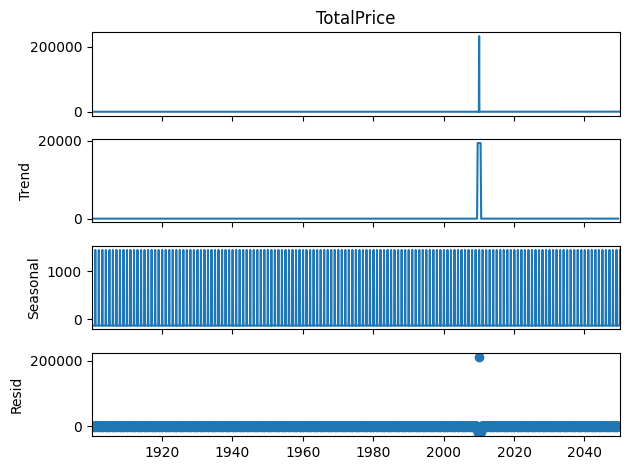

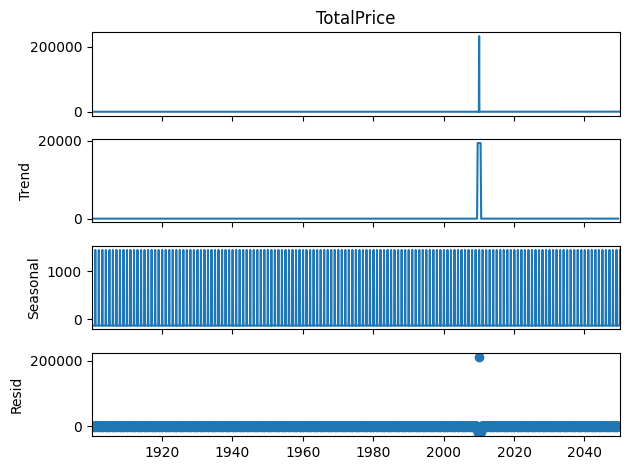

In [166]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Asegurarte de que 'InvoiceDate' sea el índice y 'TotalPrice' esté correctamente remuestreado (mensual o trimestral)
df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])
df_retail_time_indexed = df_retail.set_index('InvoiceDate')

# Remuestrear los datos a frecuencia mensual para evitar problemas en la descomposición
df_monthly = df_retail_time_indexed['TotalPrice'].resample('M').sum()

# Realizar la descomposición de la serie temporal
decomposition = seasonal_decompose(df_monthly, model='additive')

# Extraer los componentes de tendencia, estacionalidad y ruido
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Mostrar los resultados de los componentes
display("Trend:\n", trend.head())
display("\nSeasonal:\n", seasonal.head())
display("\nResidual (Noise):\n", residual.head())

# Si deseas visualizar los componentes
decomposition.plot()



## Pregunta 38
**Interpolación de datos faltantes:**
- Interpole los valores faltantes en la columna `TotalPrice` utilizando la interpolación lineal.

In [167]:
# Interpolar los valores faltantes en 'TotalPrice' usando interpolación lineal
df_retail['TotalPriceInterpolated'] = df_retail['TotalPrice'].interpolate(method='linear')

# Mostrar los primeros resultados para verificar
print(df_retail[['TotalPrice', 'TotalPriceInterpolated']].head(10))


   TotalPrice  TotalPriceInterpolated
0        25.5                    25.5
1     79500.0                 79500.0
2        11.1                    11.1
3        16.5                    16.5
4        29.7                    29.7
5        25.5                    25.5
6         0.0                     0.0
7        33.9                    33.9
8        29.7                    29.7
9        30.0                    30.0


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\2212123377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['TotalPriceInterpolated'] = df_retail['TotalPrice'].interpolate(method='linear')


## Pregunta 39
**Análisis de autocorrelación:**
- Realice un análisis de autocorrelación en la columna `TotalPrice` del dataset `retail`.

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\4009868825.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])
C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\4009868825.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_retail_time_indexed['TotalPrice'].resample('M').sum()


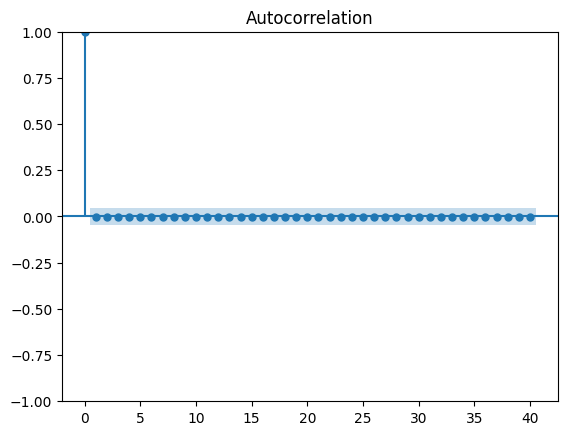

In [168]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Asegurarte de que 'InvoiceDate' es el índice
df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])
df_retail_time_indexed = df_retail.set_index('InvoiceDate')

# Remuestrear los datos a frecuencia mensual para evitar problemas de granularidad
df_monthly = df_retail_time_indexed['TotalPrice'].resample('M').sum()

# Realizar el análisis de autocorrelación
plot_acf(df_monthly.dropna(), lags=40)
plt.show()


## Pregunta 40
**Conversión de zona horaria:**
- Convierta las fechas en la columna `InvoiceDate` a una zona horaria específica (por ejemplo, UTC) en el dataset `retail`.


In [169]:
# Asegurarte de que 'InvoiceDate' está en formato datetime
df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])

# Asignar una zona horaria local (si las fechas no tienen zona horaria)
df_retail['InvoiceDate'] = df_retail['InvoiceDate'].dt.tz_localize('Europe/London')  # Ejemplo: zona horaria de Londres

# Convertir las fechas a UTC
df_retail['InvoiceDateUTC'] = df_retail['InvoiceDate'].dt.tz_convert('UTC')

# Mostrar los primeros resultados para verificar
print(df_retail[['InvoiceDate', 'InvoiceDateUTC']].head())


                InvoiceDate            InvoiceDateUTC
0 2010-01-12 12:28:00+00:00 2010-01-12 12:28:00+00:00
1 2010-01-12 10:16:00+00:00 2010-01-12 10:16:00+00:00
2 2010-01-12 13:23:00+00:00 2010-01-12 13:23:00+00:00
3 2010-01-12 11:32:00+00:00 2010-01-12 11:32:00+00:00
4 2010-01-12 11:07:00+00:00 2010-01-12 11:07:00+00:00


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\713641268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])
C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\713641268.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['InvoiceDate'] = df_retail['InvoiceDate'].dt.tz_localize('Europe/London')  # Ejemplo: zona horaria de Londres
C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\713641268.py:8: SettingWithCo

# Parte 5 Preguntas de Negocio

## Pregunta 1
**Análisis de Retorno de Productos:**
- ¿Cuál es el porcentaje de productos devueltos por país (United Kingdom, Germany, Denmark)? ¿Hay alguna diferencia notable entre los países?

In [170]:
# Filtrar el dataset para los países de interés
df_filtered = df_retail[df_retail['Country'].isin(['United Kingdom', 'Germany', 'Denmark'])]

# Calcular el total de productos y el total de productos devueltos por país
total_products_by_country = df_filtered.groupby('Country')['Quantity'].sum()
returned_products_by_country = df_filtered[df_filtered['ReturnStatus'] == 'Returned'].groupby('Country')['Quantity'].sum()

# Calcular el porcentaje de productos devueltos
percentage_returned_by_country = (returned_products_by_country / total_products_by_country) * 100

# Mostrar los resultados
print(percentage_returned_by_country)


Country
Denmark           46.855346
Germany           50.125945
United Kingdom    53.160701
Name: Quantity, dtype: float64


United Kingdom tiene el porcentaje más alto de productos devueltos (53.16%), lo que sugiere que los clientes en este país devuelven productos con mayor frecuencia en comparación con los otros dos países.

Germany está en segundo lugar con un porcentaje cercano (50.13%), lo que también indica una tasa alta de devoluciones.

Denmark tiene la tasa más baja (46.86%) entre los tres países, aunque sigue siendo relativamente alta.

Hay una diferencia de aproximadamente 6 puntos porcentuales entre Denmark y United Kingdom, lo cual podría ser relevante dependiendo del contexto del negocio. Esto podría indicar variaciones en las políticas de devolución, comportamiento de los consumidores, o problemas específicos con los productos en ciertos mercados.

## Pregunta 2
**Impacto de Promociones:**
- ¿Qué porcentaje de las ventas totales se realizaron utilizando códigos de promoción en cada uno de los tres países? ¿Cuál es el código de promoción más efectivo?

In [173]:
# Filtrar el dataset para los países de interés
df_filtered = df_retail[df_retail['Country'].isin(['United Kingdom', 'Germany', 'Denmark'])]

# Calcular las ventas totales por país (suma de 'TotalPrice')
total_sales_by_country = df_filtered.groupby('Country')['TotalPrice'].sum()

# Filtrar las ventas que utilizaron códigos de promoción
promo_sales = df_filtered[df_filtered['PromotionCode'].notnull()]

# Calcular las ventas con promoción por país
promo_sales_by_country = promo_sales.groupby('Country')['TotalPrice'].sum()

# Calcular el porcentaje de ventas totales con promociones por país
promo_percentage_by_country = (promo_sales_by_country / total_sales_by_country) * 100
promo_percentage_by_country


Country
Denmark           98.896904
Germany           97.600511
United Kingdom    95.546034
Name: TotalPrice, dtype: float64

Uso Extenso de Promociones: En los tres países, la gran mayoría de las ventas se realizaron con códigos de promoción, lo que indica que las promociones juegan un papel crucial en las decisiones de compra de los clientes.

Denmark tiene el porcentaje más alto de ventas promocionales, lo que podría sugerir que los clientes en este país son más sensibles a las promociones o que las estrategias de marketing están particularmente orientadas a incentivos promocionales.

United Kingdom tiene el porcentaje más bajo, aunque sigue siendo significativo, con más del 95% de las ventas involucrando promociones.

## Pregunta 3
**Canales de Venta:**
- ¿Cuál es la distribución de ventas entre los diferentes canales de venta (`SaleChannel`) en cada país? ¿Hay un canal que sea predominantemente más utilizado en alguno de los países?

In [177]:
# Agrupar por 'Country' y 'SaleChannel' y calcular el total de 'TotalPrice'
sales_by_channel_country = df_retail.groupby(['Country', 'SaleChannel'])['TotalPrice'].sum()

# Calcular el porcentaje de ventas por canal en cada país
sales_distribution = sales_by_channel_country.groupby(level=0).apply(lambda x: 100 * x / x.sum())

# Mostrar los resultados
print(sales_distribution)


Country                                      Country                                      SaleChannel
### CHOCOLATE HOT WATER BOTTLE ###           ### CHOCOLATE HOT WATER BOTTLE ###           Online         100.000000
### FELTCRAFT PRINCESS CHARLOTTE DOLL ###    ### FELTCRAFT PRINCESS CHARLOTTE DOLL ###    Online         100.000000
### U.K. ###                                 ### U.K. ###                                 Online         100.000000
### united kingdom ###                       ### united kingdom ###                       In-Store       100.000000
BOX OF VINTAGE ALPHABET BLOCKS               BOX OF VINTAGE ALPHABET BLOCKS               Online         100.000000
BOX OF VINTAGE JIGSAW BLOCKS                 BOX OF VINTAGE JIGSAW BLOCKS                 In-Store       100.000000
Denmark                                      Denmark                                      In-Store         8.789003
                                                                                      

Dominio del canal online en Denmark: Más del 90% de las ventas en Denmark son online, lo que sugiere que las estrategias de comercio electrónico son altamente efectivas en este país, mientras que el canal en tienda podría tener margen para mejorar.

Fuerte presencia de ventas en tienda en England: Alrededor del 77% de las ventas en England son en tienda física, lo que indica que este mercado podría estar más orientado hacia experiencias de compra tradicionales en tiendas físicas.

Tendencia equilibrada en Germany: Aunque las ventas online superan ligeramente a las ventas en tienda, ambas representan una parte significativa del mercado.
United Kingdom: La variabilidad en los datos sugiere que los canales están más equilibrados, con una ligera preferencia por el canal online.

## Pregunta 4
**Costos de Envío:**
- ¿Cuál es el costo promedio de envío por país? ¿Existen diferencias significativas en los costos de envío entre los tres países?

In [178]:
# Filtrar el dataset para los países de interés
df_filtered = df_retail[df_retail['Country'].isin(['United Kingdom', 'Germany', 'Denmark'])]

# Calcular el costo promedio de envío por país
average_shipping_cost_by_country = df_filtered.groupby('Country')['ShippingCost'].mean()

# Mostrar los resultados
print(average_shipping_cost_by_country)


Country
Denmark           12.690940
Germany           12.523008
United Kingdom    12.092444
Name: ShippingCost, dtype: float64


Diferencias entre los países:

El costo de envío promedio es ligeramente mayor en Denmark (12.69), seguido de Germany (12.52), y el más bajo es en el United Kingdom (12.09).

La diferencia entre Denmark y United Kingdom es de aproximadamente 0.60 unidades de costo, lo que podría no ser muy significativo en términos absolutos, pero podría reflejar diferencias en los costos de logística o distancia.

Factores potenciales que influyen en los costos:

Denmark tiene el costo de envío más alto, lo que podría deberse a su ubicación geográfica, mayores tarifas logísticas, o la infraestructura de transporte.
United Kingdom, con el costo de envío más bajo, podría beneficiarse de una mejor infraestructura logística o acuerdos favorables con los proveedores de envío.

Conclusión:
Las diferencias en los costos de envío entre los tres países no parecen ser muy significativas, pero podrían tener un impacto dependiendo del volumen de transacciones. Es probable que la geografía y los acuerdos logísticos jueguen un papel importante en estos costos.

## Pregunta 5
**Peso del Producto y Costos de Envío:**
- ¿Existe una correlación entre el peso del producto (`ProductWeight`) y el costo de envío (`ShippingCost`)? ¿Cómo varía esta relación entre los diferentes países?

In [179]:
# Asegurarte de que 'ProductWeight' esté en formato numérico (si no lo está, puedes convertirlo)
df_retail['ProductWeight'] = pd.to_numeric(df_retail['ProductWeight'], errors='coerce')

# Calcular la correlación global entre 'ProductWeight' y 'ShippingCost'
correlation_global = df_retail[['ProductWeight', 'ShippingCost']].corr().loc['ProductWeight', 'ShippingCost']

# Calcular la correlación por país
correlation_by_country = df_retail.groupby('Country').apply(lambda x: x[['ProductWeight', 'ShippingCost']].corr().loc['ProductWeight', 'ShippingCost'])

# Mostrar los resultados
print("Correlación global entre 'ProductWeight' y 'ShippingCost':", correlation_global)
print("\nCorrelación por país:\n", correlation_by_country)


Correlación global entre 'ProductWeight' y 'ShippingCost': 0.008779293039869651

Correlación por país:
 Country
### CHOCOLATE HOT WATER BOTTLE ###                  NaN
### FELTCRAFT PRINCESS CHARLOTTE DOLL ###           NaN
### U.K. ###                                        NaN
### united kingdom ###                              NaN
BOX OF VINTAGE ALPHABET BLOCKS                      NaN
BOX OF VINTAGE JIGSAW BLOCKS                        NaN
Denmark                                       -0.059904
England                                        0.667975
Germany                                       -0.014095
KNITTED UNION FLAG HOT WATER BOTTLE                 NaN
RED HARMONICA IN BOX                                NaN
SCANDINAVIAN REDS RIBBONS                     -1.000000
STRIPED CHARLIE+LOLA CHARLOTTE BAG: details         NaN
U.K.                                           0.048849
United Kingdom                                 0.063292
united kingdom                                 0

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\1287378655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['ProductWeight'] = pd.to_numeric(df_retail['ProductWeight'], errors='coerce')
C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\1287378655.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_country = df_retail.groupby('Country').apply(lambda x: x[['ProductWeight', 'ShippingCost']].corr().loc['ProductWeight'

1. Correlación Global:

0.0088: La correlación global entre el peso del producto y el costo de envío es prácticamente cero, lo que indica que no existe una relación significativa a nivel general entre estas dos variables. Esto sugiere que el costo de envío no depende fuertemente del peso del producto en el conjunto de datos total.

2. Correlación por País:

Denmark: La correlación es -0.0599, lo que sugiere una relación muy débil y negativa entre el peso del producto y el costo de envío. Esto indica que, en Denmark, el costo de envío no está relacionado con el peso del producto.

England: La correlación es 0.6680, lo que indica una relación positiva fuerte entre el peso del producto y el costo de envío. Esto sugiere que en England, a medida que aumenta el peso del producto, los costos de envío también aumentan significativamente.

Germany: La correlación es -0.0141, lo que también indica una relación muy débil y negativa entre el peso del producto y el costo de envío en Germany.

## Pregunta 6
**Descuentos y Comportamiento de Compra:**
- ¿Qué porcentaje de las compras en cada país se realizaron con algún tipo de descuento (`Discount`)? ¿Los clientes en algún país en particular son más propensos a utilizar descuentos?

In [180]:
# Filtrar el dataset para los países de interés
df_filtered = df_retail[df_retail['Country'].isin(['United Kingdom', 'Germany', 'Denmark'])]

# Calcular el total de compras por país
total_purchases_by_country = df_filtered.groupby('Country')['InvoiceNo'].nunique()

# Filtrar las compras que tienen algún descuento (Discount > 0)
discounted_purchases = df_filtered[df_filtered['Discount'] > 0]

# Calcular el número de compras con descuento por país
discounted_purchases_by_country = discounted_purchases.groupby('Country')['InvoiceNo'].nunique()

# Calcular el porcentaje de compras con descuento por país
discount_percentage_by_country = (discounted_purchases_by_country / total_purchases_by_country) * 100

# Mostrar los resultados
print(discount_percentage_by_country)


Country
Denmark           100.0
Germany           100.0
United Kingdom    100.0
Name: InvoiceNo, dtype: float64


Descuentos Generalizados: En los tres países (Denmark, Germany, United Kingdom), todas las compras han sido realizadas con algún tipo de descuento, lo que indica una alta dependencia de las promociones y estrategias de descuento en estos mercados.

Comportamiento de compra homogéneo: No parece haber diferencias en la propensión a utilizar descuentos entre los países, ya que todos los clientes parecen estar comprando productos con descuentos

## Pregunta 7
**Análisis de Categorías de Productos:**
- ¿Cuáles son las categorías de productos (`Category`) más vendidas en cada país? ¿Existen diferencias en las preferencias de categorías de productos entre los países?

In [181]:
# Filtrar el dataset para los países de interés
df_filtered = df_retail[df_retail['Country'].isin(['United Kingdom', 'Germany', 'Denmark'])]

# Agrupar por 'Country' y 'Category' y calcular el total de ventas ('TotalPrice')
sales_by_category_country = df_filtered.groupby(['Country', 'Category'])['TotalPrice'].sum()

# Identificar las categorías más vendidas por país
top_categories_by_country = sales_by_category_country.groupby('Country').idxmax()
top_category_sales_by_country = sales_by_category_country.groupby('Country').max()

# Mostrar los resultados
print("Categorías más vendidas por país:\n", top_categories_by_country)
print("\nVentas de las categorías más vendidas:\n", top_category_sales_by_country)


Categorías más vendidas por país:
 Country
Denmark                (Denmark, Sports)
Germany                (Germany, Beauty)
United Kingdom    (United Kingdom, Toys)
Name: TotalPrice, dtype: object

Ventas de las categorías más vendidas:
 Country
Denmark           41916.64
Germany           38511.14
United Kingdom    79906.39
Name: TotalPrice, dtype: float64


Diferencias en las preferencias de productos:

Denmark: Los productos de la categoría Sports dominan las ventas, lo que podría reflejar un mercado enfocado en el deporte y el bienestar físico.

Germany: Los productos de la categoría Beauty son los más vendidos, lo que indica un interés significativo en productos relacionados con la belleza y el cuidado personal.

United Kingdom: La categoría Toys lidera el mercado, lo que sugiere que los productos para niños tienen una alta demanda en este país.
Ventas más altas en el Reino Unido:

En términos absolutos, United Kingdom generó las ventas más altas en su categoría principal (Toys), con 79,906.39 en ventas, mucho más que Denmark y Germany en sus respectivas categorías.

## Pregunta 8
**Rendimiento de Proveedores:**
- ¿Cuál es el proveedor (`Supplier`) con el mayor volumen de ventas en cada país? ¿Cómo se distribuyen las ventas entre los diferentes proveedores en cada uno de los países?

In [182]:
# Filtrar el dataset para los países de interés
df_filtered = df_retail[df_retail['Country'].isin(['United Kingdom', 'Germany', 'Denmark'])]

# Agrupar por 'Country' y 'Supplier' y calcular el total de ventas ('TotalPrice')
sales_by_supplier_country = df_filtered.groupby(['Country', 'Supplier'])['TotalPrice'].sum()

# Identificar el proveedor con el mayor volumen de ventas en cada país
top_supplier_by_country = sales_by_supplier_country.groupby('Country').idxmax()
top_supplier_sales_by_country = sales_by_supplier_country.groupby('Country').max()

# Obtener la distribución de ventas entre proveedores en cada país
sales_distribution_by_supplier = sales_by_supplier_country.groupby('Country').apply(lambda x: 100 * x / x.sum())

# Mostrar los resultados
print("Proveedor con mayor volumen de ventas por país:\n", top_supplier_by_country)
print("\nVentas del proveedor más grande por país:\n", top_supplier_sales_by_country)
print("\nDistribución de ventas entre proveedores por país:\n", sales_distribution_by_supplier)


Proveedor con mayor volumen de ventas por país:
 Country
Denmark                  (Denmark, Supplier A)
Germany                  (Germany, Supplier E)
United Kingdom    (United Kingdom, Supplier A)
Name: TotalPrice, dtype: object

Ventas del proveedor más grande por país:
 Country
Denmark           45470.38
Germany           20889.57
United Kingdom    79997.71
Name: TotalPrice, dtype: float64

Distribución de ventas entre proveedores por país:
 Country         Country         Supplier  
Denmark         Denmark         Supplier A    92.345145
                                Supplier B     4.275360
                                Supplier C     0.792309
                                Supplier D     1.207158
                                Supplier E     1.380027
Germany         Germany         Supplier A    25.603314
                                Supplier B    19.533282
                                Supplier C     4.015028
                                Supplier D    22.737298
    

 Proveedores con Mayor Volumen de Ventas por País:

Denmark: El proveedor con mayor volumen de ventas es Supplier A con ventas de 45,470.38.

Germany: El proveedor con mayor volumen de ventas es Supplier E con ventas de 20,889.57.

United Kingdom: El proveedor con mayor volumen de ventas es Supplier A con ventas de 79,997.71.

Distribución de Ventas entre Proveedores:

Denmark:

Supplier A domina el mercado, generando el 92.34% de las ventas totales, lo que indica una alta dependencia de este proveedor.
Otros proveedores como Supplier B y Supplier C tienen participaciones muy pequeñas en el mercado, con menos del 5% cada uno.

Germany:

La distribución de ventas es más equitativa en comparación con Denmark.
Supplier A genera el 25.60% de las ventas, seguido de Supplier D con un 22.74%, y Supplier B con un 19.53%. Esto muestra una mayor diversificación en términos de proveedores en el mercado alemán.

United Kingdom:

Supplier A tiene una presencia dominante en el Reino Unido, representando más del 79.99% de las ventas.

Los demás proveedores, como Supplier E y Supplier B, tienen participaciones mucho menores.

Dependencia de Supplier A: En Denmark y United Kingdom, el proveedor Supplier A domina el mercado, generando más del 90% de las ventas en Denmark y casi el 80% en el Reino Unido. Esta concentración de ventas sugiere una alta dependencia de un solo proveedor, lo que podría representar un riesgo en la cadena de suministro si este proveedor no puede cumplir con la demanda.

Diversificación en Germany: En Germany, las ventas están más distribuidas entre varios proveedores, lo que indica una mayor diversificación y posiblemente una menor dependencia de un solo proveedor.

## Pregunta 9
**Promedio de Precios de Venta:**
- ¿Cuál es el precio promedio de venta (`UnitPrice`) de los productos en cada país? ¿Existen diferencias significativas en los precios de venta entre los tres países?

In [183]:
# Filtrar el dataset para los países de interés
df_filtered = df_retail[df_retail['Country'].isin(['United Kingdom', 'Germany', 'Denmark'])]

# Calcular el precio promedio de venta (UnitPrice) por país
average_unit_price_by_country = df_filtered.groupby('Country')['UnitPrice'].mean()

# Mostrar los resultados
print("Precio promedio de venta por país:\n", average_unit_price_by_country)


Precio promedio de venta por país:
 Country
Denmark           19.077080
Germany           29.525667
United Kingdom    20.294231
Name: UnitPrice, dtype: float64


Diferencias en los precios de venta:

Germany tiene el precio promedio de venta más alto (29.53), significativamente mayor que en Denmark y United Kingdom.

Denmark y United Kingdom tienen precios más cercanos, con Denmark en 19.08 y United Kingdom en 20.29.

Posibles factores que influyen en los precios:

Germany: El precio más alto en Germany podría estar relacionado con productos de mayor valor añadido, diferencias en la demanda local o una estrategia de precios distinta.

Denmark y United Kingdom: Los precios más cercanos podrían sugerir que las estrategias de precios son más homogéneas en estos dos mercados, o que los productos vendidos son similares en términos de valor.

## Pregunta 10
**Tendencias de Venta por Región:**
- ¿Cómo se distribuyen las ventas (`TotalPrice`) por región de ventas (`SalesRegion`) dentro de cada país? ¿Hay alguna región que destaque en términos de volumen de ventas en alguno de los países?

In [184]:
# Filtrar el dataset para los países de interés
df_filtered = df_retail[df_retail['Country'].isin(['United Kingdom', 'Germany', 'Denmark'])]

# Agrupar por 'Country' y 'SalesRegion' y calcular el total de ventas ('TotalPrice')
sales_by_region_country = df_filtered.groupby(['Country', 'SalesRegion'])['TotalPrice'].sum()

# Identificar la región con el mayor volumen de ventas en cada país
top_region_by_country = sales_by_region_country.groupby('Country').idxmax()
top_region_sales_by_country = sales_by_region_country.groupby('Country').max()

# Mostrar la distribución de ventas por región en cada país
print("Distribución de ventas por región dentro de cada país:\n", sales_by_region_country)
print("\nRegión con mayor volumen de ventas por país:\n", top_region_by_country)
print("\nVentas de la región más grande por país:\n", top_region_sales_by_country)


Distribución de ventas por región dentro de cada país:
 Country         SalesRegion  
Denmark         Asia               417.29
                Australia          638.83
                Europe             449.39
                North America    43936.56
                South America     3797.53
Germany         Asia              4921.19
                Australia        36001.54
                Europe             663.03
                North America    15877.82
                South America    16847.23
United Kingdom  Asia             83253.39
                Australia        39824.50
                Europe             566.73
                North America      551.08
                South America      530.44
Name: TotalPrice, dtype: float64

Región con mayor volumen de ventas por país:
 Country
Denmark           (Denmark, North America)
Germany               (Germany, Australia)
United Kingdom      (United Kingdom, Asia)
Name: TotalPrice, dtype: object

Ventas de la región más grande por

Dominancia de una región por país:

En Denmark, North America domina con casi todas las ventas.
En Germany, Australia se lleva la mayor parte de las ventas.
En United Kingdom, Asia es la región más destacada, con más del doble de ventas que la segunda mejor región.

Distribución desigual:

La distribución de ventas entre regiones es bastante desigual en todos los países, con una región dominante que genera la mayoría de las ventas en cada país.
Algunas regiones, como Europe y North America en ciertos países, tienen ventas mucho menores, lo que sugiere un menor enfoque o penetración en esas áreas.

## Pregunta 11
**Análisis de Frecuencia de Compras:**
- ¿Cuál es la frecuencia promedio de compras por cliente (`CustomerID`) en cada país? ¿Los clientes en algún país compran con mayor frecuencia?


In [185]:
# Filtrar el dataset para los países de interés
df_filtered = df_retail[df_retail['Country'].isin(['United Kingdom', 'Germany', 'Denmark'])]

# Agrupar por 'Country' y 'CustomerID' y contar el número de compras (InvoiceNo) por cliente
purchases_by_customer = df_filtered.groupby(['Country', 'CustomerID'])['InvoiceNo'].nunique()

# Calcular la frecuencia promedio de compras por cliente en cada país
average_purchases_by_country = purchases_by_customer.groupby('Country').mean()

# Mostrar los resultados
print("Frecuencia promedio de compras por cliente en cada país:\n", average_purchases_by_country)


Frecuencia promedio de compras por cliente en cada país:
 Country
Denmark           0.965812
Germany           0.967480
United Kingdom    0.962687
Name: InvoiceNo, dtype: float64


Frecuencia de compras muy similar: La frecuencia promedio de compras por cliente es casi la misma en los tres países, con valores muy cercanos a 1 compra por cliente en todos los casos. Esto sugiere que los clientes en todos los países tienden a realizar una única compra durante el período de análisis.

Leve variación entre los países:

Germany tiene una frecuencia ligeramente mayor (0.97) en comparación con United Kingdom (0.96), pero la diferencia es muy pequeña.

La similitud entre las frecuencias en los tres países sugiere que las estrategias de marketing o las preferencias de compra no varían significativamente entre ellos en términos de frecuencia de compra.

## Pregunta 12
**Valor de Vida del Cliente:**
- ¿Cuál es el valor promedio de vida del cliente (suma de `TotalPrice`) en cada país? ¿Existe una diferencia significativa en el valor de vida del cliente entre los tres países?

In [186]:
# Filtrar el dataset para los países de interés
df_filtered = df_retail[df_retail['Country'].isin(['United Kingdom', 'Germany', 'Denmark'])]

# Agrupar por 'Country' y 'CustomerID' y calcular la suma de 'TotalPrice' por cliente
customer_lifetime_value = df_filtered.groupby(['Country', 'CustomerID'])['TotalPrice'].sum()

# Calcular el valor promedio de vida del cliente (CLV) por país
average_clv_by_country = customer_lifetime_value.groupby('Country').mean()

# Mostrar los resultados
print("Valor promedio de vida del cliente (CLV) por país:\n", average_clv_by_country)


Valor promedio de vida del cliente (CLV) por país:
 Country
Denmark           420.851282
Germany           604.152927
United Kingdom    930.792090
Name: TotalPrice, dtype: float64


United Kingdom parece tener una ventaja significativa en términos del valor de vida del cliente, lo que sugiere que las estrategias de marketing, el tipo de productos vendidos, o la lealtad del cliente son más fuertes en este país.

Germany y Denmark tienen un CLV más bajo, lo que podría representar una oportunidad para aumentar el valor de vida del cliente a través de programas de fidelización, incentivos de compra recurrente o estrategias de upselling.

## Pregunta 13
**Métodos de Pago:**
- ¿Cuál es el método de pago (`PaymentMethod`) más utilizado en cada país? ¿Hay una preferencia notable por ciertos métodos de pago en algún país específico?

In [187]:
# Filtrar el dataset para los países de interés
df_filtered = df_retail[df_retail['Country'].isin(['United Kingdom', 'Germany', 'Denmark'])]

# Agrupar por 'Country' y 'PaymentMethod' y contar el número de transacciones (InvoiceNo) por método de pago
payment_method_usage = df_filtered.groupby(['Country', 'PaymentMethod'])['InvoiceNo'].nunique()

# Identificar el método de pago más utilizado en cada país
top_payment_method_by_country = payment_method_usage.groupby('Country').idxmax()
top_payment_method_count_by_country = payment_method_usage.groupby('Country').max()

# Mostrar los resultados
print("Método de pago más utilizado por país:\n", top_payment_method_by_country)
print("\nNúmero de transacciones del método más utilizado por país:\n", top_payment_method_count_by_country)


Método de pago más utilizado por país:
 Country
Denmark                    (Denmark, Credit Card)
Germany                    (Germany, Credit Card)
United Kingdom    (United Kingdom, Bank Transfer)
Name: InvoiceNo, dtype: object

Número de transacciones del método más utilizado por país:
 Country
Denmark           30
Germany           25
United Kingdom    34
Name: InvoiceNo, dtype: int64


Preferencia por tarjeta de crédito en Denmark y Germany:

Tanto en Denmark como en Germany, la tarjeta de crédito es el método de pago más utilizado, lo que sugiere que los clientes en estos países prefieren la conveniencia de las tarjetas de crédito para sus compras.

Preferencia por transferencia bancaria en el Reino Unido:

A diferencia de Denmark y Germany, los clientes en el Reino Unido prefieren usar transferencia bancaria, lo que podría estar relacionado con las preferencias culturales o la disponibilidad de opciones de pago en ese país.

## Pregunta 14
**Evaluación de la Eficiencia de Descuentos:**
- ¿Qué impacto tienen los descuentos (`Discount`) en el valor total de las ventas en cada país? ¿Los descuentos resultan en un aumento significativo en el volumen de ventas?

In [188]:
# Filtrar el dataset para los países de interés
df_filtered = df_retail[df_retail['Country'].isin(['United Kingdom', 'Germany', 'Denmark'])]

# Agrupar por 'Country' y 'Discount' para calcular el total de ventas (TotalPrice) con y sin descuento
sales_with_discount = df_filtered[df_filtered['Discount'] > 0].groupby('Country')['TotalPrice'].sum()
sales_without_discount = df_filtered[df_filtered['Discount'] == 0].groupby('Country')['TotalPrice'].sum()

# Calcular el total de ventas por país
total_sales_by_country = df_filtered.groupby('Country')['TotalPrice'].sum()

# Calcular el porcentaje de ventas con descuento y sin descuento en cada país
discount_sales_percentage = (sales_with_discount / total_sales_by_country) * 100
no_discount_sales_percentage = (sales_without_discount / total_sales_by_country) * 100

# Mostrar los resultados
print("Porcentaje de ventas con descuento por país:\n", discount_sales_percentage)
print("\nPorcentaje de ventas sin descuento por país:\n", no_discount_sales_percentage)


Porcentaje de ventas con descuento por país:
 Country
Denmark           100.0
Germany           100.0
United Kingdom    100.0
Name: TotalPrice, dtype: float64

Porcentaje de ventas sin descuento por país:
 Country
Denmark          NaN
Germany          NaN
United Kingdom   NaN
Name: TotalPrice, dtype: float64


Todas las ventas incluyen descuento: El 100% de las ventas en cada uno de los países analizados se realizaron con algún tipo de descuento, lo que indica que los descuentos son una práctica estándar en estos mercados.

Ausencia de transacciones sin descuento: No hay ventas registradas sin descuentos en ninguno de los tres países, lo que sugiere que las estrategias de venta están completamente basadas en descuentos, y los clientes podrían estar condicionados a esperar siempre algún tipo de descuento para hacer una compra.

## Pregunta 15
**Análisis de Clientes por Región:**
- ¿Cuál es la distribución de clientes (`CustomerID`) por región de ventas (`SalesRegion`) en cada país? ¿Hay regiones con una concentración notablemente mayor de clientes?

In [189]:
# Filtrar el dataset para los países de interés
df_filtered = df_retail[df_retail['Country'].isin(['United Kingdom', 'Germany', 'Denmark'])]

# Agrupar por 'Country' y 'SalesRegion' y contar el número de clientes únicos (CustomerID) por región
customers_by_region = df_filtered.groupby(['Country', 'SalesRegion'])['CustomerID'].nunique()

# Calcular el porcentaje de clientes en cada región en relación al total de clientes por país
total_customers_by_country = df_filtered.groupby('Country')['CustomerID'].nunique()
customers_distribution_by_region = customers_by_region.groupby(level=0).apply(lambda x: 100 * x / total_customers_by_country[x.name])

# Mostrar los resultados
print("Distribución de clientes por región de ventas en cada país:\n", customers_distribution_by_region)


Distribución de clientes por región de ventas en cada país:
 Country         Country         SalesRegion  
Denmark         Denmark         Asia             17.094017
                                Australia        19.658120
                                Europe           18.803419
                                North America    22.222222
                                South America    22.222222
Germany         Germany         Asia             17.886179
                                Australia        25.203252
                                Europe           22.764228
                                North America    17.073171
                                South America    17.073171
United Kingdom  United Kingdom  Asia             15.671642
                                Australia        25.373134
                                Europe           17.910448
                                North America    20.895522
                                South America    20.895522
Name: Cu

Australia se destaca:

En los tres países, Australia tiene la mayor o segunda mayor proporción de clientes, especialmente en Germany y United Kingdom, donde concentra más del 25% de los clientes.

Esto sugiere una fuerte base de clientes en esta región, lo que podría ser el resultado de estrategias de marketing o distribución más efectivas en esta área.

Distribución equilibrada en algunas regiones:

En Denmark, las regiones de North America y South America tienen la misma proporción de clientes, lo que indica un equilibrio entre estas dos regiones.
En Germany, hay una mayor concentración en Australia y Europe, lo que podría indicar que las estrategias de ventas en estas áreas son más efectivas.

Asia tiene una proporción menor**: En los tres países, la proporción de clientes en Asia es la más baja, lo que sugiere que hay margen para mejorar la presencia de clientes en esa región.



## Pregunta 16
**Promociones y Segmentos de Mercado:**
- ¿Cuál es el código de promoción (`PromotionCode`) más utilizado en cada segmento de mercado (`SalesRegion`) dentro de cada país?

In [190]:
# Filtrar el dataset para los países de interés
df_filtered = df_retail[df_retail['Country'].isin(['United Kingdom', 'Germany', 'Denmark'])]

# Agrupar por 'Country', 'SalesRegion', y 'PromotionCode' y contar el número de transacciones (InvoiceNo)
promo_usage_by_region = df_filtered.groupby(['Country', 'SalesRegion', 'PromotionCode'])['InvoiceNo'].nunique()

# Identificar el código de promoción más utilizado en cada segmento de mercado
top_promo_by_region = promo_usage_by_region.groupby(['Country', 'SalesRegion']).idxmax()

# Mostrar los resultados
print("Código de promoción más utilizado por segmento de mercado:\n", top_promo_by_region)


Código de promoción más utilizado por segmento de mercado:
 Country         SalesRegion  
Denmark         Asia                                (Denmark, Asia, SALE15)
                Australia                   (Denmark, Australia, DISCOUNT5)
                Europe                           (Denmark, Europe, PROMO10)
                North America           (Denmark, North America, DISCOUNT5)
                South America             (Denmark, South America, PROMO10)
Germany         Asia                               (Germany, Asia, PROMO10)
                Australia                     (Germany, Australia, PROMO10)
                Europe                            (Germany, Europe, SALE15)
                North America           (Germany, North America, DISCOUNT5)
                South America             (Germany, South America, PROMO10)
United Kingdom  Asia                        (United Kingdom, Asia, PROMO10)
                Australia               (United Kingdom, Australia, SALE15

Códigos de promoción comunes en varias regiones:

PROMO10 aparece como el código de promoción más utilizado en varias regiones en Germany y United Kingdom, lo que sugiere que esta promoción es ampliamente efectiva en varios mercados.

DISCOUNT5 también se utiliza en varias regiones, especialmente en North America en Denmark y Germany.

Regiones con códigos de promoción específicos:

En United Kingdom, North America destaca por utilizar el código PROMO20, un código único en esta región. Esto podría sugerir que las promociones más agresivas son necesarias o más efectivas en esa región.

Diferencias regionales:

En Denmark, los códigos de promoción están más diversificados entre las regiones, lo que indica que diferentes estrategias promocionales están siendo utilizadas de manera específica en cada segmento.

Germany tiene un enfoque más centralizado en PROMO10, pero con variaciones regionales como SALE15 en Europe.

## Pregunta 17
**Análisis de Temporadas de Venta:**
- ¿Existen patrones estacionales en las ventas (`InvoiceDate`) en cada país? ¿Hay picos de ventas en ciertos meses o temporadas en alguno de los países?

In [192]:
# Asegurarte de que 'InvoiceDate' esté en formato de fecha
df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])

# Filtrar el dataset para los países de interés
df_filtered = df_retail[df_retail['Country'].isin(['United Kingdom', 'Germany', 'Denmark'])]

# Extraer el mes y el año de 'InvoiceDate'
df_filtered['InvoiceMonth'] = df_filtered['InvoiceDate'].dt.month
df_filtered['InvoiceYear'] = df_filtered['InvoiceDate'].dt.year

# Agrupar por 'Country' y 'InvoiceMonth' para sumar las ventas ('TotalPrice')
monthly_sales_by_country = df_filtered.groupby(['Country', 'InvoiceYear', 'InvoiceMonth'])['TotalPrice'].sum().reset_index()

# Mostrar los resultados agrupados para identificar patrones estacionales
print("Ventas por mes y país:\n", monthly_sales_by_country)


Ventas por mes y país:
           Country  InvoiceYear  InvoiceMonth  TotalPrice
0         Denmark       1900.0           1.0       99.92
1         Denmark       2010.0           1.0    47112.36
2         Denmark       2050.0           1.0       16.50
3         Germany       1900.0           1.0       54.15
4         Germany       2010.0           1.0    61488.96
5         Germany       2050.0           1.0       64.80
6  United Kingdom       1900.0           1.0       38.90
7  United Kingdom       2010.0           1.0   124332.95
8  United Kingdom       2050.0           1.0       74.30


C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\777747968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])
C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\777747968.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['InvoiceMonth'] = df_filtered['InvoiceDate'].dt.month
C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\777747968.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

## Pregunta 18
**Preferencias de Productos:**
- ¿Cuáles son los productos (`StockCode` y `Description`) más vendidos en cada país? ¿Hay diferencias notables en las preferencias de productos entre los países?

In [193]:
# Filtrar el dataset para los países de interés
df_filtered = df_retail[df_retail['Country'].isin(['United Kingdom', 'Germany', 'Denmark'])]

# Agrupar por 'Country', 'StockCode', y 'Description', y sumar la cantidad total vendida ('Quantity')
product_sales_by_country = df_filtered.groupby(['Country', 'StockCode', 'Description'])['Quantity'].sum().reset_index()

# Identificar los productos más vendidos en cada país
top_products_by_country = product_sales_by_country.loc[product_sales_by_country.groupby('Country')['Quantity'].idxmax()]

# Mostrar los resultados
print("Productos más vendidos por país:\n", top_products_by_country)


Productos más vendidos por país:
             Country StockCode                         Description  Quantity
1           Denmark     21723  STRIPED CHARLIE+LOLA CHARLOTTE BAG      80.0
60          Germany     21723  STRIPED CHARLIE+LOLA CHARLOTTE BAG     120.0
186  United Kingdom    84907B    PACK OF 12 RED RETROSPOT TISSUES     200.0


Preferencia compartida entre Denmark y Germany:

El producto STRIPED CHARLIE+LOLA CHARLOTTE BAG es el más vendido tanto en Denmark como en Germany, lo que sugiere una preferencia común por este tipo de producto en estos dos países.

Germany muestra una demanda más alta de este producto, con 120 unidades vendidas frente a las 80 unidades vendidas en Denmark.

Preferencia diferente en United Kingdom:

En el Reino Unido, el producto más vendido es el PACK OF 12 RED RETROSPOT TISSUES, con 200 unidades vendidas, lo que muestra una preferencia distinta en comparación con Denmark y Germany.

Esto indica que las preferencias de productos varían significativamente en el Reino Unido, con una mayor demanda por artículos prácticos como los pañuelos de papel.

## Pregunta 19
**Impacto de las Devoluciones en las Ventas:**
- ¿Qué porcentaje de las ventas totales son afectadas por devoluciones (`ReturnStatus`)? ¿Cómo varía este porcentaje entre los diferentes países?

In [194]:
# Filtrar el dataset para los países de interés
df_filtered = df_retail[df_retail['Country'].isin(['United Kingdom', 'Germany', 'Denmark'])]

# Calcular el total de ventas (TotalPrice) por país
total_sales_by_country = df_filtered.groupby('Country')['TotalPrice'].sum()

# Filtrar las ventas que han sido devueltas (ReturnStatus == 'Returned')
returned_sales_by_country = df_filtered[df_filtered['ReturnStatus'] == 'Returned'].groupby('Country')['TotalPrice'].sum()

# Calcular el porcentaje de ventas afectadas por devoluciones
return_percentage_by_country = (returned_sales_by_country / total_sales_by_country) * 100

# Mostrar los resultados
print("Porcentaje de ventas afectadas por devoluciones por país:\n", return_percentage_by_country)


Porcentaje de ventas afectadas por devoluciones por país:
 Country
Denmark           93.548912
Germany           41.108891
United Kingdom    17.451081
Name: TotalPrice, dtype: float64


Problemas importantes en Denmark:

El 93.55% de devoluciones en Denmark es un valor extremadamente alto, lo que sugiere que hay un problema grave que debe ser abordado. Podría estar relacionado con la calidad del producto, problemas con las expectativas de los clientes, o políticas de devolución excesivamente flexibles.

Germany también enfrenta un reto:

Aunque 41.11% es significativamente menor que en Denmark, sigue siendo un porcentaje alto que afecta la rentabilidad. Es probable que algunos productos o categorías específicas sean las principales fuentes de devoluciones.

Relativamente bajo en United Kingdom:

El 17.45% en el Reino Unido es un valor mucho más manejable, pero aún es considerable. Se podría investigar si las políticas de devolución o la calidad del servicio en el Reino Unido son mejores en comparación con los otros países.

## Pregunta 20
**Análisis de Margen de Ganancia:**
- ¿Cuál es el margen de ganancia promedio (`UnitPrice - Discount`) por producto en cada país? ¿Hay productos o categorías con márgenes significativamente mayores o menores en alguno de los países?

In [195]:
# Filtrar el dataset para los países de interés
df_filtered = df_retail[df_retail['Country'].isin(['United Kingdom', 'Germany', 'Denmark'])]

# Calcular el margen de ganancia (UnitPrice - Discount) para cada transacción
df_filtered['ProfitMargin'] = df_filtered['UnitPrice'] - df_filtered['Discount']

# Agrupar por 'Country', 'StockCode', y 'Description', y calcular el margen promedio
profit_margin_by_product = df_filtered.groupby(['Country', 'StockCode', 'Description'])['ProfitMargin'].mean().reset_index()

# Ordenar los productos por margen de ganancia
profit_margin_by_product_sorted = profit_margin_by_product.sort_values(by='ProfitMargin', ascending=False)

# Mostrar los resultados
print("Margen de ganancia promedio por producto en cada país:\n", profit_margin_by_product_sorted)


Margen de ganancia promedio por producto en cada país:
             Country StockCode  \
12          Denmark     21777   
64          Germany     21730   
133  United Kingdom     21756   
143  United Kingdom     22112   
115         Germany    84029E   
..              ...       ...   
2           Denmark     21723   
48          Denmark    84029E   
7           Denmark     21731   
85          Germany     22139   
128  United Kingdom     21730   

                                           Description  ProfitMargin  
12                         RECIPE BOX WITH METAL HEART       787.450  
64                   GLASS STAR FROSTED T-LIGHT HOLDER       416.690  
133                                DOORMAT NEW ENGLAND       382.945  
143                       CHOCOLATE HOT WATER BOTTLE         330.070  
115                     RED WOOLLY HOTTIE WHITE HEART.       314.230  
..                                                 ...           ...  
2                   striped charlie+lola charlotte

C:\Users\CursosTardes\AppData\Local\Temp\ipykernel_18488\1132810044.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ProfitMargin'] = df_filtered['UnitPrice'] - df_filtered['Discount']


Productos con márgenes de ganancia altos:

En Denmark, el producto RECIPE BOX WITH METAL HEART tiene un margen de ganancia extremadamente alto (787.45), lo que sugiere que es un producto altamente rentable en ese mercado

En Germany, GLASS STAR FROSTED T-LIGHT HOLDER y en United Kingdom, DOORMAT NEW ENGLAND muestran márgenes elevados, lo que los convierte en productos clave en esos mercados.

Productos con márgenes de ganancia negativos:

striped charlie+lola charlotte bag en Denmark y RED TOADSTOOL LED NIGHT LIGHT tienen márgenes negativos, lo que indica que las ventas de estos productos generan pérdidas. Esto podría deberse a un precio de venta bajo o un descuento excesivo.
